In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

We retrieved disordered region information from MobiDb

In [3]:
mobi1 = pd.read_csv("mobidb_result_2022-03-03T09_47_39.301Z.tsv", sep="\t")
print(mobi1.shape[0])
mobi1.head()

1241631


,acc,feature,start..end,content_fraction,content_count,length
0,C0HLV8,prediction-disorder-th_50,"1..4,22..31",0.452,14,31
1,C0HLV8,prediction-low_complexity-merge,8..17,0.323,10,31
2,C0HLV8,prediction-disorder-iups,"1..4,25..31",0.355,11,31
3,C0HLV8,prediction-disorder-espN,"1..3,28..31",0.226,7,31
4,C0HLV8,prediction-disorder-espD,1..31,1.000,31,31


In [4]:
mobi1["acc"].nunique()

78106

In [5]:
mobi1[mobi1["feature"].str.contains("homology")]["feature"].value_counts()

homology-domain-merge                                  57280
homology-domain-pfam                                   53966
homology-domain-gene3d                                 29775
homology-disorder-merge                                 1074
homology-disorder-priority                              1059
homology-disorder-disprot                                823
homology-lip-merge                                       621
homology-lip-priority                                    588
homology-conformational_diversity-merge                  463
homology-conformational_diversity-codnas                 463
homology-disorder-ideal                                  411
homology-lip-disprot                                     338
homology-lip-dibs                                        229
homology-binding_mode_disorder_to_disorder-fuzdb         154
homology-binding_mode_disorder_to_disorder-merge         154
homology-binding_mode_disorder_to_disorder-priority      154
homology-lip-ideal      

In [6]:
mobi1[mobi1["feature"].str.contains("th_90")]["feature"].value_counts()

derived-observed-th_90                              7269
derived-missing_residues-th_90                      5448
derived-missing_residues_context_dependent-th_90    5045
derived-mobile_context_dependent-th_90              1974
derived-mobile-th_90                                1803
derived-lip-th_90                                   1757
Name: feature, dtype: int64

In [7]:
mobi1[(mobi1["feature"].str.contains("curated")==False)&(mobi1["feature"].str.contains("th_90")==False)&
           (mobi1["feature"].str.contains("lip")==True)&(mobi1["feature"].str.contains("homology-disorder-uniprot")==False)
    ]["feature"].value_counts()

prediction-lip-anchor      57042
prediction-lip-priority     2273
derived-lip-merge           2248
derived-lip-priority        1531
homology-lip-merge           621
homology-lip-priority        588
homology-lip-disprot         338
homology-lip-dibs            229
homology-lip-ideal           104
homology-lip-mfib             80
homology-lip-elm              32
Name: feature, dtype: int64

In [8]:
mobi = mobi1[(((mobi1["feature"].str.contains("curated"))|(mobi1["feature"].str.contains("disorder-mobidb_lite"))|
               (mobi1["feature"].str.contains("prediction-disorder-iups"))|(mobi1["feature"].str.contains("prediction-disorder-iupl"))|
           ((mobi1["feature"].str.contains("homology"))&(mobi1["feature"].str.contains("homology-domain")==False)))&
                                                               ((mobi1["feature"].str.contains("lip")==False)&
                                                               (mobi1["feature"].str.contains("binding_mode")==False)))]
mobi.rename(columns={"acc": "ACC_ID"}, inplace=True)
print(mobi.shape[0])
mobi.head()

183635


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1330/2598111647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobi.rename(columns={"acc": "ACC_ID"}, inplace=True)


,ACC_ID,feature,start..end,content_fraction,content_count,length
2,C0HLV8,prediction-disorder-iups,"1..4,25..31",0.355,11,31
15,A0A7P0T821,prediction-disorder-iupl,"4..5,8..24,48..60",0.533,32,60
16,A0A7P0T821,prediction-disorder-iups,"1..10,14..24,52..60",0.500,30,60
28,A0A7P0TA09,prediction-disorder-iups,"1..5,254..256",0.031,8,256
37,A0A7P0T8G2,prediction-disorder-iupl,"1..4,6..17,24..29,43..44,48..49,52..52,67..68,...",0.391,109,279


In [9]:
mobi["feature"].value_counts()

prediction-disorder-iups                    77579
prediction-disorder-iupl                    62131
prediction-disorder-mobidb_lite             34865
curated-disorder-priority                    1189
curated-disorder-merge                       1189
homology-disorder-merge                      1074
homology-disorder-priority                   1059
homology-disorder-disprot                     823
curated-disorder-disprot                      722
curated-disorder-ideal                        679
homology-conformational_diversity-merge       463
homology-conformational_diversity-codnas      463
homology-disorder-ideal                       411
curated-conformational_diversity-merge        385
curated-conformational_diversity-codnas       385
curated-phase_separation-merge                 55
curated-phase_separation-phasepro              55
homology-phase_separation-merge                40
homology-phase_separation-phasepro             40
curated-disorder-uniprot                       26


In [10]:
data_site= pd.read_csv("site_data", sep="\t")
data_site.head()

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
proteins_mobi = pd.merge(mobi, data_site[["ACC_ID", "UP_POS"]], on="ACC_ID", how="inner")
print(proteins_mobi.shape[0])
proteins_mobi.head()

82923


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,32
1,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,39
2,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,47
3,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,65
4,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,66


In [12]:
proteins_mobi1 = proteins_mobi["start..end"].str.split(",", expand=True)

In [13]:
proteins_mobi = pd.merge(proteins_mobi, proteins_mobi1, how="inner", left_index=True, right_index=True)
print(proteins_mobi.shape[0])
proteins_mobi.head()

82923


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS,0,1,2,...,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040
0,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,32,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
1,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,39,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
2,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,47,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
3,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,65,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
4,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,66,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None


In [15]:
proteins_mobi_sub_tot = pd.DataFrame({})
for i in range (1041):
    proteins_mobi_sub = proteins_mobi[~proteins_mobi[i].isnull()]
    proteins_mobi_sub = proteins_mobi.loc[proteins_mobi["UP_POS"].astype(float, copy=False).between(proteins_mobi[i].str.partition("..")[0].astype(float, copy=False), proteins_mobi[i].str.partition("..")[2].astype(float, copy=False))]
    proteins_mobi_sub_tot = proteins_mobi_sub_tot.append(proteins_mobi_sub, ignore_index=True)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [16]:
for i in range(1041):
    proteins_mobi_sub_tot.drop(i, axis=1, inplace=True)
print(proteins_mobi_sub_tot.shape[0])
print(proteins_mobi_sub_tot["ACC_ID"].nunique())
proteins_mobi_sub_tot.head()

4734
439


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P22314,homology-conformational_diversity-codnas,202..312,0.105,111,1058,273
1,P22314,homology-conformational_diversity-codnas,202..312,0.105,111,1058,309
2,P22314,homology-conformational_diversity-merge,202..312,0.105,111,1058,273
3,P22314,homology-conformational_diversity-merge,202..312,0.105,111,1058,309
4,P17480,curated-conformational_diversity-codnas,479..560,0.107,82,764,484


In [17]:
#proteins_mobi_sub_tot.to_csv("Mobi_DB annotation_proteins", sep="\t", index=False)

We'll now add this data to the three categories of proteins respectively.

# 1. Tissue-specific phosphorylated proteins, tissue aspecific phosphorylated proteins, pervasively phosphorylated proteins

We have selected disordered regions from MobiDB based on where MobiDB has retrieved its information, or where it has been identified, and limited this to the regions in which a phosphosites from our dataset is present. We'll now combine this data with the tissue-specific phosphorylated proteins, the tissue aspecific phosphorylated proteins and the pervasively phosphorylated proteins. In order to do this, we retrieve the previously stored infomation of which proteins belong to which category, and add the site data to this, after which we merge the data for these three categories with the MobiDB annotation.

In [14]:
proteins_mobi_sub_tot = pd.read_csv("Mobi_DB annotation_proteins", sep="\t")
print(proteins_mobi_sub_tot.shape[0])
print(proteins_mobi_sub_tot["ACC_ID"].nunique())
proteins_mobi_sub_tot.head()

44413
4116


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P63104,prediction-disorder-iupl,"30..31,66..66,70..70,72..81,153..154,231..245",0.127,31,245,30
1,Q53H54,prediction-disorder-iupl,"1..9,49..49,54..54,56..60,62..62,70..70,72..74...",0.132,59,448,8
2,Q53H54,prediction-disorder-iups,"1..9,60..61,63..63,72..75,85..86,89..91,96..98...",0.112,50,448,8
3,P10074,prediction-disorder-iupl,"121..198,201..253,258..258,272..274,276..281,2...",0.256,176,688,171
4,P26368,prediction-disorder-mobidb_lite,1..90,0.189,90,475,79


In [15]:
t_spec_prot = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
non_t_spec_prot = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
general_P_prot = pd.read_csv("1.1 general P proteins", sep="\t")

In [16]:
tspec_prot = pd.merge(t_spec_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(tspec_prot.shape[0])
print(tspec_prot["ACC_ID"].nunique())
tspec_prot_mobi = pd.merge(tspec_prot, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_prot_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["feature"].count().shape[0])
print(tspec_prot_mobi["ACC_ID"].nunique())
tspec_prot_mobi.head()

2794
2029
1548
1100


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0A0U1RRK4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,41,prediction-disorder-mobidb_lite,1..108,1.000,108,108
1,A0A0U1RRK4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,41,prediction-disorder-iupl,1..108,1.000,108,108
2,A0A0U1RRK4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,41,prediction-disorder-iups,"1..33,37..51,53..108",0.963,104,108
3,A0A1B0GTU1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,491,prediction-disorder-mobidb_lite,"140..194,223..351,364..433,449..468,481..506,7...",0.486,391,805
4,A0A1B0GTU1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,491,prediction-disorder-iupl,"100..200,216..216,220..433,437..437,443..511,5...",0.733,590,805


In [17]:
taspec_prot = pd.merge(non_t_spec_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(taspec_prot.shape[0])
print(taspec_prot["ACC_ID"].nunique())
taspec_prot_mobi = pd.merge(taspec_prot, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(taspec_prot_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["feature"].count().shape[0])
print(taspec_prot_mobi["ACC_ID"].nunique())
taspec_prot_mobi.head()

7371
2074
5142
1568


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,68,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
1,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,68,prediction-disorder-iups,"1..10,12..12,20..22,28..29,33..34,36..64,68..6...",0.353,306,867
2,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,102,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
3,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,192,prediction-disorder-mobidb_lite,"1..56,171..244",0.533,130,244
4,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,192,prediction-disorder-iups,"1..57,120..120,161..244",0.582,142,244


In [18]:
gen_prot = pd.merge(general_P_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(gen_prot.shape[0])
print(gen_prot["ACC_ID"].nunique())
gen_prot_mobi = pd.merge(gen_prot, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(gen_prot_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["feature"].count().shape[0])
print(gen_prot_mobi["ACC_ID"].nunique())
gen_prot_mobi.head()

13738
1752
9570
1448


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,736,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
1,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,736,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921
2,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,736,prediction-disorder-iupl,"1..34,37..45,47..104,519..521,552..572,576..57...",0.353,325,921
3,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,737,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
4,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,737,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921


<AxesSubplot:title={'center':'Number of annotated proteins in each of the three categories'}, xlabel='Tissue'>

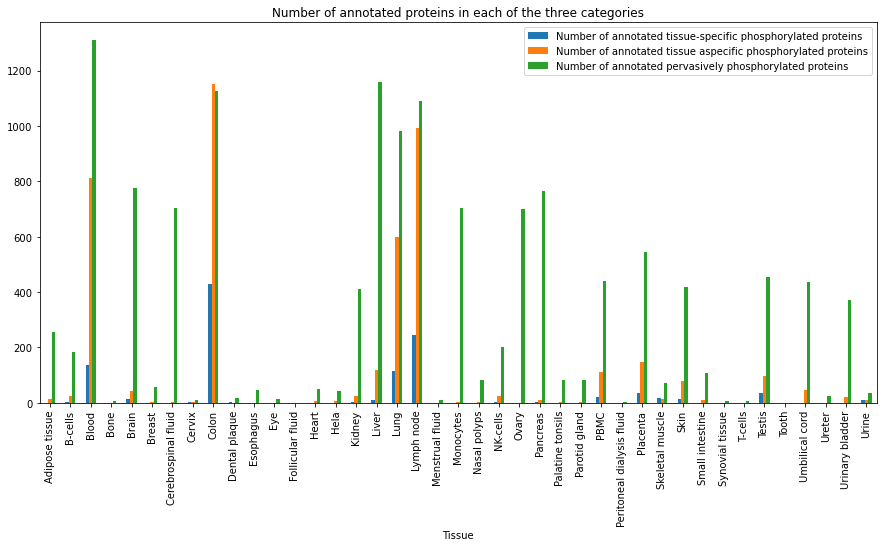

In [19]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_prot_mobi.loc[tspec_prot_mobi[tissue]==1]["ACC_ID"].nunique()
    count_taspec = taspec_prot_mobi.loc[taspec_prot_mobi[tissue]==1]["ACC_ID"].nunique()
    count_gen = gen_prot_mobi.loc[gen_prot_mobi[tissue]==1]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues = pd.DataFrame({"Tissue": list_tissues_STY, "Number of annotated tissue-specific phosphorylated proteins": tspec_counts,
                             "Number of annotated tissue aspecific phosphorylated proteins": taspec_counts,
                             "Number of annotated pervasively phosphorylated proteins": gen_counts})
distr_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title = "Number of annotated proteins in each of the three categories")
#plt.savefig("WP2 MobiDB_tissues_phosphoproteins.png", format="png", bbox_inches="tight")

In [20]:
distr_tissues

,Tissue,Number of annotated tissue-specific phosphorylated proteins,Number of annotated tissue aspecific phosphorylated proteins,Number of annotated pervasively phosphorylated proteins
0,Adipose tissue,0,15,256
1,B-cells,3,24,183
2,Blood,136,811,1309
3,Bone,0,0,6
4,Brain,12,44,777
5,Breast,0,3,58
6,Cerebrospinal fluid,1,4,705
7,Cervix,3,2,10
8,Colon,429,1150,1125
9,Dental plaque,3,0,16


In [21]:
missing_tspec = pd.merge(t_spec_prot, tspec_prot_mobi, how="outer", on=["ACC_ID"], indicator=True)
missing_tspec = missing_tspec[missing_tspec["_merge"]=="left_only"]
missing_tspec.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_tspec.drop([tissue+"_y"], axis=1, inplace=True)
missing_tspec.drop(["Total_y"], axis=1, inplace=True)
print(missing_tspec["ACC_ID"].nunique())
missing_tspec

929


,ACC_ID,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,Cerebrospinal fluid_x,Cervix_x,Colon_x,...,Synovial tissue_x,T-cells_x,Testis_x,Tooth_x,Umbilical cord_x,Ureter_x,Urinary bladder_x,Urine_x,Total_x,UP_POS
0,A0A075B6H7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
1,A0A075B6S5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
2,A0A087WXM9,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,NaN
3,A0A0B4J2D5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4,A0A0B4J2D9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Q9Y678,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4797,Q9Y6H5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4801,Q9Y6K5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4802,Q9Y6N5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN


In [22]:
missing_nontspec = pd.merge(non_t_spec_prot, taspec_prot_mobi, how="outer", on=["ACC_ID"], indicator=True)
missing_nontspec = missing_nontspec[missing_nontspec["_merge"]=="left_only"]
missing_nontspec.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_nontspec.drop([tissue+"_y"], axis=1, inplace=True)
missing_nontspec.drop(["Total_y"], axis=1, inplace=True)
print(missing_nontspec["ACC_ID"].nunique())
missing_nontspec.head()

506


,ACC_ID,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,Cerebrospinal fluid_x,Cervix_x,Colon_x,...,Synovial tissue_x,T-cells_x,Testis_x,Tooth_x,Umbilical cord_x,Ureter_x,Urinary bladder_x,Urine_x,Total_x,UP_POS
0,A0A0C4DH36,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
66,A3KN83,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,NaN
96,A6NCF6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,4,NaN
103,A6ND91,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,4,NaN
163,A8MT19,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,NaN


In [23]:
missing_genP = pd.merge(general_P_prot, gen_prot_mobi, how="outer", on=["ACC_ID"], indicator=True)
missing_genP = missing_genP[missing_genP["_merge"]=="left_only"]
missing_genP.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_genP.drop([tissue+"_y"], axis=1, inplace=True)
missing_genP.drop(["Total_y"], axis=1, inplace=True)
print(missing_genP.shape[0])
missing_genP.head()

304


,ACC_ID,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,Cerebrospinal fluid_x,Cervix_x,Colon_x,...,Synovial tissue_x,T-cells_x,Testis_x,Tooth_x,Umbilical cord_x,Ureter_x,Urinary bladder_x,Urine_x,Total_x,UP_POS
0,A0A0C4DH39,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,7,NaN
50,A6NEL2,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,8,NaN
51,A6NIJ9,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,7,NaN
92,A6NNZ2,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,7,NaN
130,B1ANY3,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,7,NaN


We add the amount of missing proteins, per tissue, per category, to the dataframe that contains the number of proteins in each of the three categories. The loss of proteins seems to be spread in accordance to the number of proteins identified as being tissue-specific, tissue aspecific and pervasively phosphorylated proteins.

In [24]:
list_missing_tspec = []
list_missing_nontspec = []
list_missing_genP = []
list_all_tspec = []
list_all_genP = []
for tissue in list_tissues_STY:
    tissue=tissue+"_x"
    count_missing_tspec = missing_tspec[tissue].sum()
    count_missing_nontspec = missing_nontspec[tissue].sum()
    count_missing_genP = missing_genP[tissue].sum()
    list_missing_tspec.append(count_missing_tspec)
    list_missing_nontspec.append(count_missing_nontspec)
    list_missing_genP.append(count_missing_genP)
missing = pd.read_csv("number of three categories per tissue.tsv", sep="\t")
missing["missing tissue-specific phosphorylated proteins"] = list_missing_tspec
missing["missing tissue aspecific phosphorylated proteins"] = list_missing_nontspec
missing["missing pervasively phosphorylated proteins"] = list_missing_genP

<AxesSubplot:title={'center':'Proteins having no phosphosite in a disordered region'}, xlabel='Tissue'>

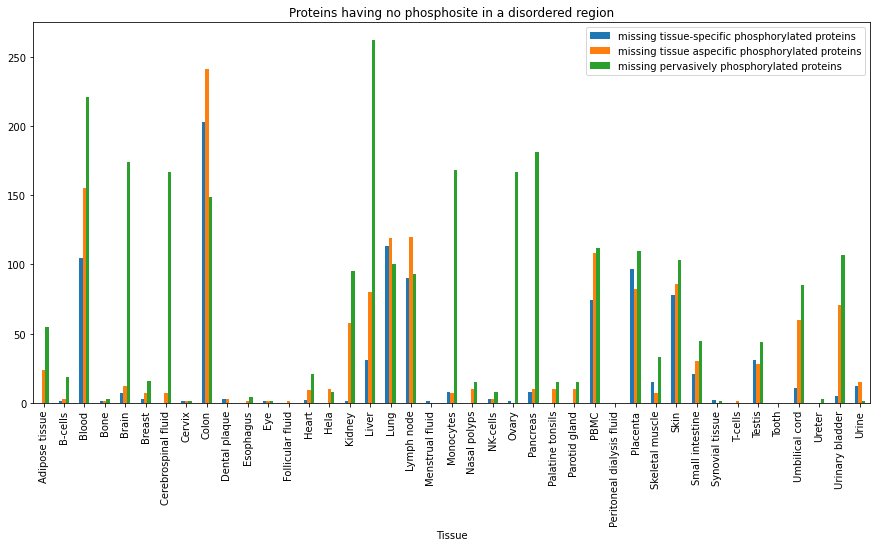

In [25]:
missing[["Tissue", "missing tissue-specific phosphorylated proteins", "missing tissue aspecific phosphorylated proteins", "missing pervasively phosphorylated proteins"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Proteins having no phosphosite in a disordered region")

In [26]:
missing

,Tissue,number of tissue-specific proteins,number of non tissue-specific proteins,number of generally expressed proteins,Total,missing tissue-specific phosphorylated proteins,missing tissue aspecific phosphorylated proteins,missing pervasively phosphorylated proteins
0,Adipose tissue,0,39,311,350,0,24,55
1,B-cells,4,27,202,233,1,3,19
2,Blood,241,966,1530,2737,105,155,221
3,Bone,1,1,9,11,1,1,3
4,Brain,19,56,951,1026,7,12,174
5,Breast,3,10,74,87,3,7,16
6,Cerebrospinal fluid,1,11,872,884,0,7,167
7,Cervix,4,3,11,18,1,1,1
8,Colon,632,1391,1274,3297,203,241,149
9,Dental plaque,6,3,16,25,3,3,0


We now compare, per category of proteins, the amount of proteins for which at least one site has been identified in a disordered region, to the amount of proteins for which no P-sites could be identified in a disordered region.

<AxesSubplot:title={'center':'Number of annotated tissue-speecific phosphorylated proteins compared to non-annotated'}, xlabel='Tissue'>

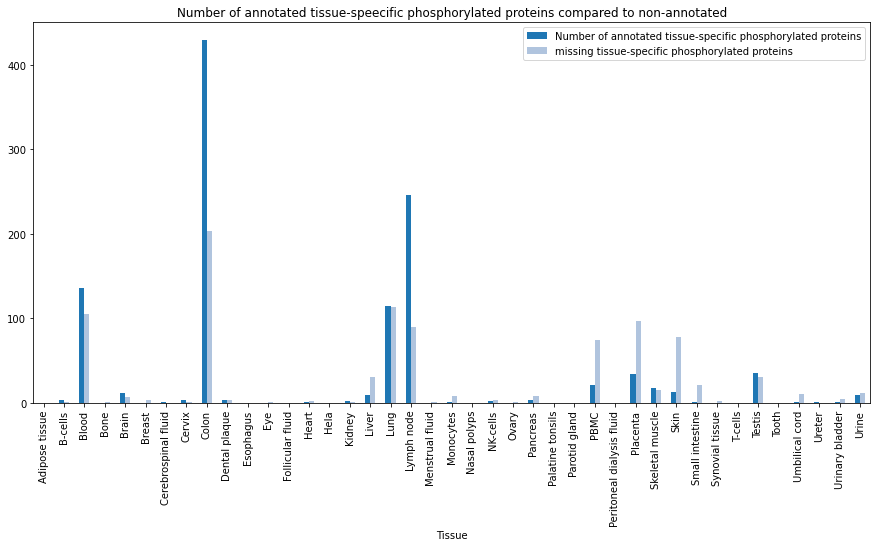

In [27]:
distr_tissues_comp = pd.merge(distr_tissues, missing[["Tissue","missing tissue-specific phosphorylated proteins", 
                                                     "missing tissue aspecific phosphorylated proteins",
                                                     "missing pervasively phosphorylated proteins"]], how="inner", on="Tissue")
distr_tissues_tspec = distr_tissues_comp[["Tissue", "Number of annotated tissue-specific phosphorylated proteins", "missing tissue-specific phosphorylated proteins"]].copy()
distr_tissues_taspec = distr_tissues_comp[["Tissue", "Number of annotated tissue aspecific phosphorylated proteins", "missing tissue aspecific phosphorylated proteins"]]
distr_tissues_gen = distr_tissues_comp[["Tissue", "Number of annotated pervasively phosphorylated proteins", "missing pervasively phosphorylated proteins"]]


distr_tissues_tspec.plot(kind="bar", x="Tissue", color=["tab:blue", "lightsteelblue"], figsize=(15,7), title="Number of annotated tissue-speecific phosphorylated proteins compared to non-annotated")

<AxesSubplot:title={'center':'Number of annotated tissue aspeecific phosphorylated proteins compared to non-annotated'}, xlabel='Tissue'>

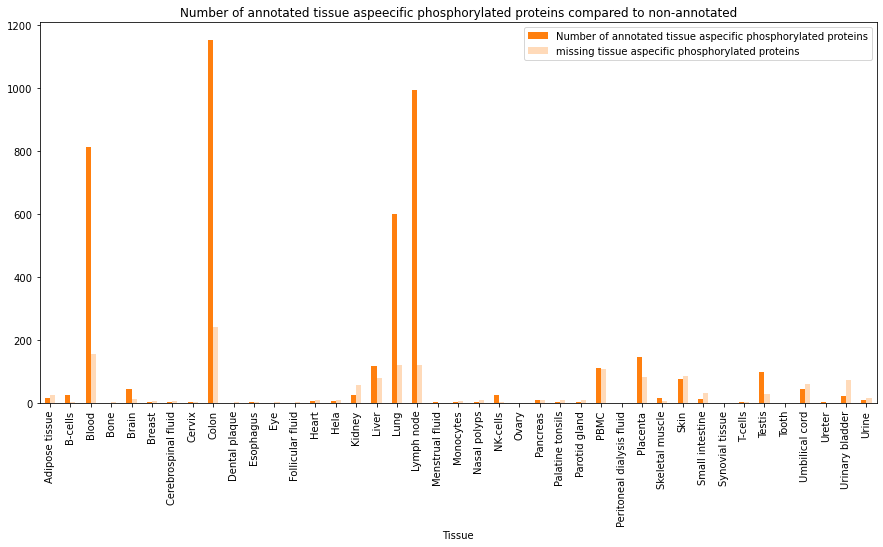

In [28]:
distr_tissues_taspec.plot(kind="bar", x="Tissue", color=["tab:orange","peachpuff"], figsize=(15,7), title="Number of annotated tissue aspeecific phosphorylated proteins compared to non-annotated")

<AxesSubplot:title={'center':'Number of annotated pervasively phosphorylated proteins compared to non-annotated'}, xlabel='Tissue'>

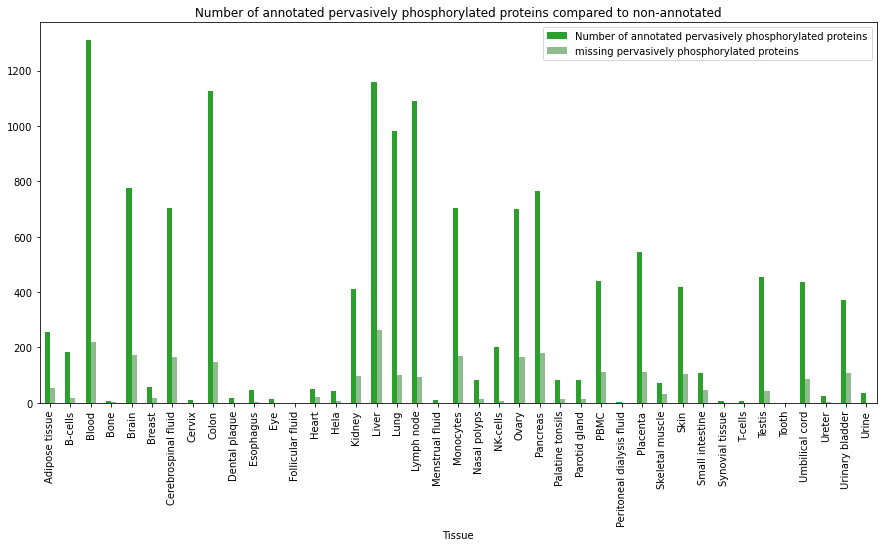

In [29]:
distr_tissues_gen.plot(kind="bar", x="Tissue", color=["tab:green", "darkseagreen"], figsize=(15,7), title="Number of annotated pervasively phosphorylated proteins compared to non-annotated")

## Number of proteins having disordered regions per category

We'll now, for each category, calculate how many proteins are annotated with a P-site in a disordered region. In the same graph, we also show the amount of proteins for which this is not the case, and the total amount of proteins. Despite there being less pervasively phorphorylated proteins, they are much better represented, which seems to go for all types of data we have considered in WP2.

<AxesSubplot:title={'center':'Comparison of number of annotated proteins to non-annotated proteins for each of the three categories'}, xlabel='Label'>

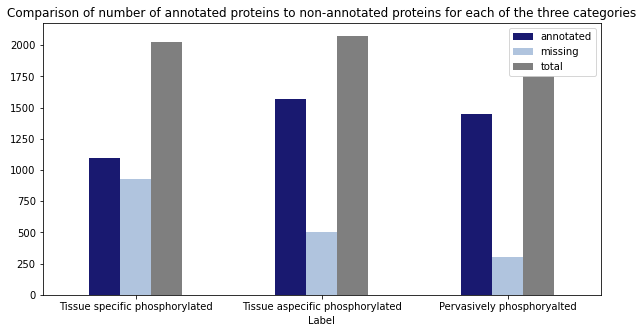

In [30]:
annotated = [tspec_prot_mobi["ACC_ID"].nunique(), taspec_prot_mobi["ACC_ID"].nunique(), gen_prot_mobi["ACC_ID"].nunique()]
             
missed = [missing_tspec["ACC_ID"].nunique(),
          missing_nontspec["ACC_ID"].nunique(),
          missing_genP["ACC_ID"].nunique()]

total = [annotated[0]+missed[0], annotated[1]+missed[1], annotated[2]+missed[2]]

three_cat = pd.DataFrame({"Label": ["Tissue specific phosphorylated", "Tissue aspecific phosphorylated",
                                   "Pervasively phosphoryalted"], "annotated": annotated, "missing": missed, "total":total})
three_cat.plot(kind="bar", x="Label" ,color=["midnightblue", "lightsteelblue", "tab:grey"], figsize=(10,5), title="Comparison of number of annotated proteins to non-annotated proteins for each of the three categories", rot=0)
#plt.savefig("WP2 MobiDB ratio annotated per cat_phosphoproteins.png", format="png", bbox_inches="tight")

In [31]:
three_cat["ratio_annotated"] = three_cat["annotated"]*100/three_cat["total"]
three_cat

,Label,annotated,missing,total,ratio_annotated
0,Tissue specific phosphorylated,1100,929,2029,54.213898
1,Tissue aspecific phosphorylated,1568,506,2074,75.602700
2,Pervasively phosphoryalted,1448,304,1752,82.648402


# Comparison of sites in disordered regions and outside disordered regions on the same protein

We go back to the annotation dataframe containing all annotation for all proteins in our data, regardless of the phosphosites occuring in the disordered region or not. We then make an indicator column that will display False for the records for which the phosphosite occurs in the disordered region. We select the records for which the phosphosites does not occur in a disordered region.

In [32]:
outside_mobi_sub = proteins_mobi.copy()
list_cols = []
for i in range (1041):
    colname = "indicator"+str(i)
    list_cols.append(colname)
    outside_mobi_sub[colname] = True
    outside_mobi_sub.loc[outside_mobi_sub["UP_POS"].astype(float, copy=False).between(outside_mobi_sub[i].str.partition("..")[0].astype(float, copy=False), outside_mobi_sub[i].str.partition("..")[2].astype(float, copy=False)), colname] = False
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


97


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


98


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


99


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


100


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


101


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


102


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


103


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


104


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


105


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


106


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


107


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


108


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


109


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


110


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


111


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


112


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


113


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


114


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


115


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


116


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


117


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


118


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


119


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


120


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


121


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


122


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


123


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


124


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


125


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


126


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


127


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


128


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


129


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


130


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


131


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


132


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


133


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


134


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


135


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


136


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


137


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


138


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


139


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


140


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


141


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


142


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


143


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


144


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


145


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


146


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


147


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


148


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


149


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


150


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


151


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


152


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


153


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


154


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


155


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


156


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


157


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


158


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


159


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


160


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


161


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


162


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


163


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


164


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


165


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


166


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


167


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


168


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


169


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


170


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


171


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


172


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


173


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


174


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


175


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


176


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


177


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


178


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


179


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


180


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


181


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


182


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


183


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


184


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


185


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


186


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


187


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


188


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


189


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


190


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


191


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


192


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


193


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


194


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


195


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


196


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


197


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


198


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


199


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


200


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


201


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


202


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


203


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


204


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


205


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


206


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


207


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


208


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


209


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


210


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


211


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


212


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


213


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


214


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


215


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


216


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


217


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


218


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


219


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


220


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


221


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


222


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


223


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


224


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


225


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


226


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


227


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


228


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


229


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


230


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


231


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


232


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


233


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


234


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


235


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


236


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


237


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


238


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


239


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


240


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


241


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


242


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


243


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


244


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


245


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


246


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


247


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


248


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


249


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


250


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


251


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


252


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


253


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


254


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


255


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


256


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


257


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


258


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


259


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


260


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


261


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


262


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


263


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


264


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


265


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


266


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


267


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


268


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


269


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


270


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


271


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


272


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


273


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


274


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


275


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


276


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


277


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


278


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


279


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


280


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


281


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


282


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


283


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


284


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


285


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


286


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


287


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


288


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


289


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


290


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


291


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


292


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


293


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


294


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


295


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


296


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


297


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


298


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


299


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


300


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


301


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


302


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


303


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


304


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


305


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


306


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


307


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


308


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


309


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


310


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


311


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


312


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


313


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


314


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


315


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


316


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


317


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


318


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


319


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


320


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


321


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


322


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


323


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


324


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


325


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


326


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


327


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


328


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


329


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


330


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


331


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


332


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


333


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


334


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


335


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


336


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


337


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


338


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


339


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


340


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


341


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


342


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


343


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


344


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


345


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


346


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


347


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


348


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


349


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


350


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


351


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


352


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


353


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


354


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


355


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


356


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


357


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


358


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


359


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


360


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


361


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


362


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


363


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


364


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


365


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


366


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


367


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


368


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


369


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


370


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


371


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


372


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


373


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


374


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


375


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


376


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


377


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


378


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


379


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


380


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


381


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


382


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


383


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


384


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


385


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


386


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


387


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


388


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


389


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


390


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


391


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


392


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


393


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


394


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


395


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


396


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


397


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


398


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


399


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


400


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


401


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


402


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


403


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


404


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


405


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


406


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


407


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


408


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


409


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


410


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


411


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


412


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


413


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


414


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


415


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


416


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


417


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


418


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


419


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


420


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


421


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


422


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


423


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


424


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


425


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


426


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


427


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


428


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


429


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


430


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


431


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


432


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


433


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


434


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


435


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


436


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


437


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


438


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


439


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


440


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


441


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


442


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


443


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


444


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


445


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


446


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


447


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


448


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


449


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


450


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


451


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


452


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


453


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


454


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


455


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


456


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


457


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


458


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


459


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


460


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


461


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


462


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


463


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


464


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


465


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


466


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


467


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


468


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


469


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


470


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


471


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


472


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


473


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


474


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


475


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


476


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


477


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


478


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


479


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


480


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


481


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


482


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


483


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


484


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


485


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


486


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


487


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


488


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


489


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


490


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


491


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


492


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


493


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


494


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


495


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


496


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


497


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


498


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


499


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


500


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


501


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


502


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


503


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


504


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


505


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


506


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


507


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


508


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


509


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


510


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


511


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


512


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


513


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


514


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


515


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


516


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


517


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


518


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


519


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


520


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


521


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


522


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


523


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


524


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


525


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


526


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


527


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


528


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


529


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


530


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


531


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


532


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


533


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


534


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


535


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


536


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


537


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


538


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


539


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


540


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


541


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


542


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


543


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


544


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


545


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


546


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


547


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


548


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


549


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


550


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


551


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


552


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


553


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


554


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


555


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


556


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


557


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


558


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


559


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


560


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


561


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


562


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


563


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


564


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


565


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


566


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


567


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


568


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


569


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


570


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


571


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


572


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


573


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


574


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


575


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


576


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


577


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


578


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


579


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


580


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


581


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


582


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


583


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


584


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


585


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


586


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


587


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


588


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


589


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


590


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


591


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


592


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


593


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


594


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


595


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


596


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


597


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


598


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


599


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


600


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


601


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


602


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


603


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


604


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


605


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


606


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


607


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


608


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


609


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


610


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


611


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


612


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


613


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


614


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


615


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


616


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


617


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


618


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


619


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


620


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


621


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


622


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


623


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


624


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


625


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


626


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


627


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


628


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


629


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


630


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


631


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


632


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


633


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


634


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


635


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


636


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


637


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


638


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


639


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


640


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


641


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


642


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


643


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


644


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


645


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


646


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


647


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


648


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


649


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


650


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


651


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


652


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


653


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


654


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


655


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


656


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


657


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


658


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


659


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


660


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


661


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


662


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


663


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


664


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


665


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


666


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


667


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


668


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


669


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


670


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


671


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


672


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


673


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


674


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


675


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


676


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


677


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


678


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


679


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


680


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


681


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


682


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


683


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


684


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


685


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


686


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


687


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


688


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


689


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


690


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


691


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


692


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


693


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


694


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


695


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


696


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


697


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


698


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


699


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


700


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


701


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


702


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


703


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


704


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


705


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


706


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


707


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


708


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


709


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


710


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


711


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


712


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


713


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


714


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


715


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


716


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


717


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


718


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


719


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


720


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


721


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


722


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


723


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


724


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


725


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


726


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


727


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


728


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


729


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


730


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


731


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


732


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


733


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


734


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


735


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


736


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


737


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


738


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


739


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


740


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


741


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


742


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


743


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


744


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


745


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


746


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


747


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


748


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


749


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


750


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


751


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


752


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


753


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


754


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


755


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


756


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


757


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


758


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


759


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


760


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


761


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


762


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


763


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


764


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


765


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


766


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


767


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


768


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


769


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


770


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


771


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


772


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


773


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


774


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


775


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


776


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


777


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


778


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


779


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


780


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


781


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


782


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


783


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


784


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


785


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


786


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


787


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


788


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


789


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


790


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


791


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


792


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


793


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


794


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


795


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


796


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


797


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


798


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


799


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


800


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


801


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


802


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


803


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


804


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


805


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


806


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


807


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


808


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


809


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


810


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


811


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


812


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


813


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


814


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


815


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


816


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


817


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


818


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


819


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


820


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


821


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


822


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


823


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


824


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


825


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


826


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


827


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


828


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


829


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


830


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


831


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


832


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


833


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


834


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


835


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


836


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


837


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


838


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


839


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


840


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


841


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


842


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


843


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


844


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


845


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


846


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


847


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


848


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


849


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


850


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


851


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


852


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


853


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


854


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


855


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


856


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


857


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


858


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


859


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


860


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


861


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


862


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


863


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


864


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


865


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


866


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


867


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


868


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


869


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


870


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


871


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


872


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


873


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


874


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


875


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


876


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


877


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


878


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


879


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


880


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


881


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


882


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


883


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


884


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


885


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


886


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


887


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


888


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


889


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


890


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


891


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


892


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


893


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


894


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


895


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


896


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


897


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


898


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


899


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


900


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


901


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


902


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


903


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


904


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


905


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


906


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


907


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


908


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


909


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


910


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


911


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


912


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


913


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


914


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


915


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


916


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


917


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


918


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


919


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


920


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


921


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


922


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


923


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


924


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


925


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


926


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


927


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


928


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


929


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


930


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


931


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


932


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


933


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


934


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


935


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


936


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


937


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


938


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


939


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


940


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


941


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


942


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


943


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


944


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


945


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


946


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


947


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


948


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


949


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


950


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


951


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


952


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


953


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


954


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


955


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


956


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


957


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


958


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


959


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


960


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


961


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


962


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


963


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


964


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


965


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


966


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


967


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


968


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


969


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


970


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


971


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


972


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


973


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


974


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


975


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


976


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


977


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


978


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


979


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


980


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


981


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


982


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


983


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


984


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


985


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


986


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


987


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


988


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


989


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


990


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


991


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


992


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


993


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


994


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


995


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


996


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


997


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


998


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


999


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1000


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1001


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1002


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1003


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1004


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1005


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1006


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1007


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1008


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1009


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1010


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1011


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1012


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1013


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1014


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1015


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1016


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1017


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1018


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1019


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1020


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1021


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1022


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1023


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1024


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1025


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1026


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1027


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1028


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1029


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1030


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1031


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1032


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1033


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1034


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1035


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1036


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1037


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1038


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1039


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/722478491.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outside_mobi_sub[colname] = True


1040


In [33]:
outside_mobi_sub1 = outside_mobi_sub[outside_mobi_sub[list_cols].all(axis=1)]
outside_mobi_sub1
for i in range(1041):
    outside_mobi_sub1.drop(i, axis=1, inplace=True)
    col = "indicator"+str(i)
    outside_mobi_sub1.drop(col, axis=1, inplace=True)
    print(i)
outside_mobi_sub1

/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


0


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


1


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


2


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


3


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


4


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


5


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


6


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


7


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


8


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


9


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


10


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


11


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


12


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


13


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


14


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


15


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


16


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


17


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


18


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


19


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


20


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


21


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


22


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


23


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


24


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


25


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


26


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


27


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


28


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


29


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


30


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


31


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


32


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


33


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


34


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


35


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


36


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


37


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


38


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


39


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


40


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


41


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


42


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


43


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


44


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


45


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


46


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


47


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


48


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


49


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


50


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


51


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


52


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


53


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


54


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


55


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


56


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


57


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


58


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


59


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


60


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


61


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


62


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


63


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


64


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


65


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


66


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


67


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


68


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


69


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


70


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


71


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


72


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


73


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


74


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


75


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


76


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


77


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


78


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


79


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


80


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


81


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


82


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


83


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


84


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


85


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


86


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


87


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


88


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


89


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


90


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


91


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


92


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


93


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


94


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


95


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


96


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


97


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


98


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


99


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


100


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


101


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


102


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


103


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


104


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


105


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


106


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


107


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


108


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


109


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


110


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


111


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


112


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


113


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


114


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


115


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


116


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


117


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


118


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


119


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


120


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


121


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


122


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


123


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


124


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


125


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


126


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


127


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


128


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


129


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


130


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


131


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


132


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


133


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


134


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


135


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


136


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


137


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


138


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


139


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


140


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


141


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


142


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


143


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


144


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


145


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


146


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


147


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


148


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


149


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


150


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


151


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


152


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


153


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


154


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


155


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


156


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


157


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


158


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


159


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


160


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


161


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


162


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


163


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


164


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


165


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


166


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


167


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


168


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


169


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


170


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


171


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


172


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


173


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


174


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


175


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


176


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


177


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


178


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


179


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


180


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


181


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


182


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


183


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


184


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


185


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


186


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


187


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


188


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


189


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


190


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


191


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


192


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


193


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


194


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


195


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


196


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


197


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


198


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


199


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


200


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


201


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


202


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


203


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


204


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


205


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


206


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


207


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


208


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


209


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


210


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


211


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


212


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


213


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


214


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


215


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


216


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


217


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


218


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


219


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


220


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


221


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


222


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


223


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


224


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


225


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


226


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


227


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


228


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


229


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


230


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


231


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


232


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


233


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


234


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


235


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


236


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


237


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


238


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


239


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


240


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


241


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


242


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


243


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


244


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


245


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


246


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


247


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


248


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


249


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


250


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


251


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


252


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


253


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


254


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


255


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


256


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


257


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


258


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


259


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


260


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


261


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


262


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


263


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


264


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


265


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


266


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


267


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


268


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


269


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


270


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


271


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


272


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


273


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


274


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


275


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


276


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


277


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


278


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


279


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


280


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


281


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


282


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


283


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


284


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


285


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


286


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


287


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


288


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


289


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


290


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


291


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


292


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


293


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


294


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


295


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


296


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


297


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


298


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


299


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


300


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


301


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


302


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


303


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


304


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


305


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


306


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


307


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


308


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


309


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


310


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


311


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


312


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


313


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


314


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


315


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


316


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


317


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


318


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


319


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


320


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


321


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


322


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


323


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


324


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


325


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


326


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


327


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


328


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


329


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


330


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


331


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


332


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


333


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


334


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


335


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


336


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


337


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


338


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


339


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


340


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


341


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


342


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


343


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


344


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


345


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


346


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


347


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


348


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


349


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


350


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


351


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


352


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


353


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


354


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


355


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


356


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


357


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


358


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


359


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


360


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


361


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


362


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


363


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


364


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


365


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


366


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


367


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


368


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


369


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


370


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


371


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


372


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


373


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


374


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


375


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


376


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


377


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


378


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


379


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


380


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


381


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


382


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


383


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


384


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


385


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


386


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


387


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


388


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


389


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


390


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


391


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


392


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


393


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


394


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


395


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


396


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


397


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


398


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


399


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


400


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


401


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


402


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


403


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


404


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


405


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


406


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


407


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


408


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


409


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


410


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


411


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


412


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


413


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


414


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


415


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


416


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


417


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


418


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


419


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


420


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


421


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


422


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


423


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


424


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


425


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


426


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


427


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


428


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


429


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


430


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


431


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


432


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


433


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


434


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


435


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


436


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


437


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


438


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


439


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


440


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


441


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


442


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


443


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


444


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


445


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


446


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


447


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


448


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


449


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


450


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


451


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


452


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


453


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


454


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


455


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


456


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


457


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


458


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


459


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


460


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


461


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


462


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


463


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


464


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


465


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


466


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


467


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


468


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


469


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


470


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


471


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


472


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


473


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


474


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


475


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


476


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


477


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


478


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


479


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


480


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


481


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


482


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


483


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


484


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


485


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


486


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


487


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


488


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


489


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


490


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


491


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


492


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


493


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


494


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


495


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


496


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


497


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


498


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


499


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


500


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


501


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


502


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


503


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


504


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


505


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


506


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


507


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


508


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


509


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


510


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


511


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


512


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


513


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


514


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


515


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


516


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


517


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


518


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


519


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


520


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


521


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


522


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


523


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


524


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


525


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


526


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


527


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


528


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


529


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


530


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


531


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


532


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


533


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


534


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


535


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


536


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


537


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


538


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


539


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


540


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


541


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


542


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


543


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


544


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


545


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


546


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


547


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


548


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


549


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


550


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


551


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


552


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


553


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


554


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


555


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


556


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


557


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


558


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


559


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


560


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


561


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


562


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


563


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


564


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


565


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


566


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


567


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


568


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


569


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


570


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


571


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


572


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


573


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


574


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


575


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


576


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


577


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


578


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


579


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


580


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


581


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


582


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


583


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


584


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


585


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


586


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


587


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


588


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


589


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


590


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


591


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


592


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


593


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


594


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


595


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


596


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


597


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


598


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


599


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


600


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


601


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


602


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


603


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


604


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


605


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


606


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


607


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


608


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


609


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


610


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

611


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


612


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


613


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


614


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


615


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


616


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


617


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


618


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


619


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

620


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


621


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


622


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


623


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


624


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

625


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


626


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


627


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


628


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


629


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


630


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


631


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


632


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


633


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

634


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


635


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


636


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


637


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


638


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

639


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


640


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


641


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


642


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


643


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


644


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


645


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


646


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


647


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

648


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


649


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


650


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


651


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


652


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

653


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


654


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


655


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


656


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


657


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


658


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


659


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


660


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


661


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


662


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


663


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


664


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


665


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


666


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

667


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


668


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


669


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


670


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


671


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


672


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


673


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


674


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


675


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


676


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


677


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


678


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


679


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


680


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


681


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


682


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


683


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


684


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


685


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

686


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


687


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


688


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


689


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


690


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


691


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


692


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


693


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


694


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


695


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


696


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


697


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


698


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


699


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


700


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


701


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


702


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


703


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


704


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

705


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


706


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


707


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


708


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


709


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


710


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


711


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


712


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


713


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


714


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


715


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


716


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


717


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


718


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


719


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


720


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


721


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


722


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


723


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

724


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


725


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


726


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


727


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


728


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


729


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


730


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


731


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


732


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


733


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


734


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


735


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


736


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


737


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


738


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


739


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


740


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


741


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


742


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

743


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


744


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


745


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


746


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


747


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


748


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


749


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


750


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


751


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


752


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


753


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


754


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


755


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


756


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


757


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


758


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


759


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


760


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


761


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

762


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


763


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


764


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


765


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


766


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


767


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


768


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


769


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


770


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


771


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


772


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


773


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


774


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


775


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


776


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


777


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


778


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


779


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


780


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

781


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


782


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


783


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


784


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


785


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


786


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


787


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


788


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


789


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


790


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


791


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


792


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


793


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


794


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


795


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


796


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


797


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


798


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


799


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

800


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


801


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


802


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


803


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


804


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


805


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


806


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


807


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


808


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


809


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


810


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


811


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


812


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


813


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


814


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


815


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


816


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

817
818


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

819
820


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

821
822


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

823


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


824


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


825


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


826


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


827


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


828


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

829
830


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

831
832


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

833


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

834
835


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

836
837


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

838
839


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

840
841


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

842


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


843
844


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

845
846


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


847


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

848
849


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

850
851


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

852
853


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

854
855


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

856


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

857
858


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

859
860


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

861


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


862
863


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

864
865


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


866


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

867
868


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

869
870


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

871
872


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

873
874


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

875


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

876
877


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

878
879


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

880


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

881
882


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

883
884


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

885


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

886
887


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

888
889


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

890
891


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

892
893


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

894


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

895
896


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

897
898


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

899


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

900
901


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

902
903


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

904


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

905
906


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

907
908


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


909
910


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

911
912


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

913


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

914
915


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

916
917


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)


918


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

919
920


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

921
922


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


923


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

924
925


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

926
927


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


928
929


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

930
931


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

932


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


933
934


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

935
936


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

937


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

938
939


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

940
941


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)


942


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

943
944
945


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

946
947


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

948
949
950


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

951


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

952
953
954


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

955
956


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

957
958
959


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

960
961


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

962
963
964


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

965
966


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

967
968
969


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

970
971


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

972
973
974


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

975
976


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

977
978
979
980


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

981
982
983
984


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

985
986
987
988


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

989
990
991


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

992
993
994


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

995
996
997
998


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

999
1000
1001


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

1002
1003
1004
1005
1006


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

1007
1008
1009
1010


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

1011
1012
1013
1014
1015


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

1016
1017
1018
1019
1020


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

1021
1022
1023
1024
1025
1026
1027


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(i, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_mobi_sub1.drop(col, axis=1, inplace=True)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1209/3901705965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
1,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,39
2,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,47
5,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,106
6,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,130
8,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,186
...,...,...,...,...,...,...,...
82918,Q8WYJ6,prediction-disorder-mobidb_lite,352..372,0.056,21,372,206
82919,Q8WYJ6,prediction-disorder-mobidb_lite,352..372,0.056,21,372,247
82920,Q8WYJ6,prediction-disorder-mobidb_lite,352..372,0.056,21,372,248
82921,Q8WYJ6,prediction-disorder-mobidb_lite,352..372,0.056,21,372,315


In [34]:
tspec_proteins_out = pd.merge(tspec_prot[["ACC_ID", "UP_POS"]], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
print(tspec_proteins_out["ACC_ID"].nunique())
print(tspec_proteins_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
tspec_proteins_out

1488
1926


,ACC_ID,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0A075B6H7,30,prediction-disorder-iupl,25..29,0.043,5,116
1,A0A075B6H7,30,prediction-disorder-iups,"1..2,113..116",0.052,6,116
2,A0A075B6S5,52,prediction-disorder-iups,"1..4,111..117",0.094,11,117
3,A0A087WXM9,223,prediction-disorder-mobidb_lite,"1..91,250..276",0.316,118,373
4,A0A087WXM9,223,prediction-disorder-iupl,"3..108,110..117,172..172,174..174,210..210,224...",0.426,159,373
...,...,...,...,...,...,...,...
4660,Q9Y6R7,5062,prediction-disorder-iups,"1..1,1029..1030,1036..1045,1051..1055,1399..14...",0.025,134,5405
4661,Q9Y6X8,37,prediction-disorder-mobidb_lite,"164..204,404..445,755..837",0.198,166,837
4662,Q9Y6Y8,926,prediction-disorder-mobidb_lite,"133..252,716..748",0.153,153,1000
4663,Q9Y6Y8,926,prediction-disorder-iupl,"1..19,46..46,48..71,93..110,112..122,124..126,...",0.282,282,1000


In [35]:
sublist_tissues = list_tissues_STY.copy()
sublist_tissues.insert(0, "ACC_ID")
sublist_tissues.insert(1, "UP_POS")
sublist_tissues

['ACC_ID',
 'UP_POS',
 'Adipose tissue',
 'B-cells',
 'Blood',
 'Bone',
 'Brain',
 'Breast',
 'Cerebrospinal fluid',
 'Cervix',
 'Colon',
 'Dental plaque',
 'Esophagus',
 'Eye',
 'Follicular fluid',
 'Heart',
 'Hela',
 'Kidney',
 'Liver',
 'Lung',
 'Lymph node',
 'Menstrual fluid',
 'Monocytes',
 'Nasal polyps',
 'NK-cells',
 'Ovary',
 'Pancreas',
 'Palatine tonsils',
 'Parotid gland',
 'PBMC',
 'Peritoneal dialysis fluid',
 'Placenta',
 'Skeletal muscle',
 'Skin',
 'Small intestine',
 'Synovial tissue',
 'T-cells',
 'Testis',
 'Tooth',
 'Umbilical cord',
 'Ureter',
 'Urinary bladder',
 'Urine']

We now consider only proteins having P-sites inside AND outside a disordered region. After this, we seperate the entries inside a disordered region and outside a disordered region.

In [36]:
tspec_proteins_inandout_out = pd.merge(tspec_prot_mobi[sublist_tissues], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
tspec_proteins_inandout_out

,ACC_ID,UP_POS,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,...,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,feature,start..end,content_fraction,content_count,length
0,A1L429,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iups,"1..6,22..117",0.872,102,117
1,A1L429,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iups,"1..6,22..117",0.872,102,117
2,A2A3L6,524,0,0,0,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,"1..31,418..481,548..582",0.223,130,582
3,A2A3L6,524,0,0,0,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iups,"1..37,41..47,49..49,110..110,306..306,418..478...",0.266,155,582
4,A2VDJ0,1067,0,0,0,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,"946..974,991..1014,1108..1144,1159..1178,1304....",0.091,147,1609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,Q9Y676,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,214..258,0.174,45,258
2738,Q9Y676,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iupl,"30..31,44..44,79..82,85..93,150..150,176..190,...",0.298,77,258
2739,Q9Y6P5,314,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iupl,"32..32,35..35,37..39,254..258,284..299,323..324",0.057,28,492
2740,Q9Y6X8,37,0,0,0,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,"164..204,404..445,755..837",0.198,166,837


In [37]:
tspec_proteins_inandout_in = pd.merge(tspec_proteins_inandout_out["ACC_ID"], tspec_prot_mobi, on=["ACC_ID"], how="inner")
tspec_proteins_inandout_in

,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A1L429,0,0,0,0,0,0,0,0,0,...,0,0,0,1,10,prediction-disorder-mobidb_lite,1..117,1.000,117,117
1,A1L429,0,0,0,0,0,0,0,0,0,...,0,0,0,1,10,prediction-disorder-iupl,"3..5,9..117",0.957,112,117
2,A1L429,0,0,0,0,0,0,0,0,0,...,0,0,0,1,10,prediction-disorder-mobidb_lite,1..117,1.000,117,117
3,A1L429,0,0,0,0,0,0,0,0,0,...,0,0,0,1,10,prediction-disorder-iupl,"3..5,9..117",0.957,112,117
4,A2A3L6,0,0,0,0,0,0,0,0,1,...,0,0,0,1,524,prediction-disorder-iupl,"1..35,40..53,60..63,65..65,99..109,113..114,33...",0.393,229,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,Q9Y6P5,0,0,1,0,0,0,0,0,0,...,0,0,0,1,314,prediction-disorder-iups,"1..5,34..34,37..42,44..51,55..57,282..282,284....",0.096,47,492
15418,Q9Y6X8,0,0,0,0,0,0,0,0,1,...,0,0,0,1,37,prediction-disorder-iupl,"1..51,53..68,91..98,124..131,136..139,143..143...",0.502,420,837
15419,Q9Y6X8,0,0,0,0,0,0,0,0,1,...,0,0,0,1,37,prediction-disorder-iups,"1..51,53..53,59..64,155..155,163..215,404..404...",0.374,313,837
15420,Q9Y6X8,0,0,0,0,0,0,0,0,1,...,0,0,0,1,37,prediction-disorder-iupl,"1..51,53..68,91..98,124..131,136..139,143..143...",0.502,420,837


537 tissue-specific phosphorylated proteins have 813 phosphosites inside a disordered region, and 687 phosphosites outside a disordered region.

In [38]:
print(tspec_proteins_inandout_in["ACC_ID"].nunique())
print(tspec_proteins_inandout_out["ACC_ID"].nunique())
print(tspec_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
print(tspec_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])

537
537
813
687


In [39]:
taspec_proteins_out = pd.merge(taspec_prot[["ACC_ID", "UP_POS"]], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
print(taspec_proteins_out["ACC_ID"].nunique())
print(taspec_proteins_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
taspec_proteins_out

1622
4434


,ACC_ID,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0A0C4DH36,108,prediction-disorder-iups,114..116,0.026,3,116
1,A0AVK6,68,prediction-disorder-mobidb_lite,"38..58,408..432,532..616,771..800",0.186,161,867
2,A0AVK6,71,prediction-disorder-mobidb_lite,"38..58,408..432,532..616,771..800",0.186,161,867
3,A0AVK6,71,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
4,A0AVK6,71,prediction-disorder-iups,"1..10,12..12,20..22,28..29,33..34,36..64,68..6...",0.353,306,867
...,...,...,...,...,...,...,...
10987,Q9Y6W5,103,prediction-disorder-iupl,"1..1,86..86,88..88,90..91,93..93,121..142,168....",0.721,359,498
10988,Q9Y6W5,103,prediction-disorder-iups,"1..7,122..123,129..129,132..139,171..203,214.....",0.532,265,498
10989,Q9Y6W5,104,prediction-disorder-mobidb_lite,"173..203,240..435",0.456,227,498
10990,Q9Y6W5,104,prediction-disorder-iupl,"1..1,86..86,88..88,90..91,93..93,121..142,168....",0.721,359,498


In [40]:
taspec_proteins_inandout_out = pd.merge(taspec_prot_mobi[sublist_tissues], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
taspec_proteins_inandout_out

,ACC_ID,UP_POS,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,...,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,feature,start..end,content_fraction,content_count,length
0,A0AVK6,68,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,"38..58,408..432,532..616,771..800",0.186,161,867
1,A0AVK6,68,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,"38..58,408..432,532..616,771..800",0.186,161,867
2,A0AVK6,102,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,"38..58,408..432,532..616,771..800",0.186,161,867
3,A0AVK6,102,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iups,"1..10,12..12,20..22,28..29,33..34,36..64,68..6...",0.353,306,867
4,A0MZ66,506,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iups,"1..11,13..13,27..28,38..39,118..126,128..128,1...",0.450,284,631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,Q9Y6N7,1038,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iups,"1..1,33..78,82..84,88..92,98..98,100..117,183....",0.460,759,1651
9904,Q9Y6N7,1055,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,"33..57,1124..1202,1224..1337,1352..1397,1420.....",0.300,496,1651
9905,Q9Y6N7,1055,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iups,"1..1,33..78,82..84,88..92,98..98,100..117,183....",0.460,759,1651
9906,Q9Y6N9,201,0,0,0,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,401..427,0.049,27,552


In [41]:
taspec_proteins_inandout_in = pd.merge(taspec_proteins_inandout_out["ACC_ID"], taspec_prot_mobi, on =["ACC_ID"], how="inner")
taspec_proteins_inandout_in

,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,68,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
1,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,68,prediction-disorder-iups,"1..10,12..12,20..22,28..29,33..34,36..64,68..6...",0.353,306,867
2,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,102,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
3,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,68,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
4,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,68,prediction-disorder-iups,"1..10,12..12,20..22,28..29,33..34,36..64,68..6...",0.353,306,867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164401,Q9Y6N7,0,0,1,0,0,0,0,0,0,...,0,0,0,3,1445,prediction-disorder-iupl,"26..59,65..67,72..75,77..77,82..96,98..119,179...",0.525,866,1651
164402,Q9Y6N9,0,0,0,0,0,0,0,0,1,...,0,0,0,2,201,prediction-disorder-iupl,"196..202,309..309,318..318,328..362,385..385,3...",0.161,89,552
164403,Q9Y6N9,0,0,0,0,0,0,0,0,1,...,0,0,0,2,201,prediction-disorder-iups,"1..5,195..204,206..206,329..337,341..346,397.....",0.139,77,552
164404,Q9Y6N9,0,0,0,0,0,0,0,0,1,...,0,0,0,2,201,prediction-disorder-iupl,"196..202,309..309,318..318,328..362,385..385,3...",0.161,89,552


954 tissue aspecific phosphorylated proteins have 3 626 P-sites inside a disordered region and 2 215 P-sites outside a disordered region. 

In [42]:
print(taspec_proteins_inandout_in["ACC_ID"].nunique())
print(taspec_proteins_inandout_out["ACC_ID"].nunique())
print(taspec_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
print(taspec_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])

954
954
3626
2215


In [43]:
gen_prot.groupby(["ACC_ID", "UP_POS"], as_index=False)[list_tissues_STY].max().shape[0]

13738

In [44]:
gen_proteins_out = pd.merge(gen_prot[["ACC_ID", "UP_POS"]], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
print(gen_proteins_out["ACC_ID"].nunique())
print(gen_proteins_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
gen_proteins_out

1479
8179


,ACC_ID,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0A0C4DH39,51,prediction-disorder-iupl,24..25,0.017,2,117
1,A0A0C4DH39,51,prediction-disorder-iups,"1..1,114..117",0.043,5,117
2,A0FGR8,758,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
3,A0FGR8,758,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921
4,A0FGR8,761,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
...,...,...,...,...,...,...,...
22848,Q9Y6X4,635,prediction-disorder-iups,"1..8,24..24,27..27,274..464,468..634,636..637,...",0.590,395,670
22849,Q9Y6Y0,326,prediction-disorder-mobidb_lite,257..281,0.039,25,642
22850,Q9Y6Y0,336,prediction-disorder-mobidb_lite,257..281,0.039,25,642
22851,Q9Y6Y0,338,prediction-disorder-mobidb_lite,257..281,0.039,25,642


In [45]:
gen_proteins_inandout_out = pd.merge(gen_prot_mobi[sublist_tissues], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
gen_proteins_inandout_out

,ACC_ID,UP_POS,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,...,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,feature,start..end,content_fraction,content_count,length
0,A0FGR8,758,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
1,A0FGR8,758,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921
2,A0FGR8,761,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
3,A0FGR8,761,0,0,1,0,0,0,0,0,...,0,0,0,0,0,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921
4,A0JNW5,987,0,0,1,0,1,0,1,0,...,0,0,0,0,0,prediction-disorder-mobidb_lite,"267..297,409..436,1066..1089,1164..1183,1392.....",0.085,125,1464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22879,Q9Y6Y0,326,0,0,0,0,0,0,0,0,...,0,0,0,1,0,prediction-disorder-mobidb_lite,257..281,0.039,25,642
22880,Q9Y6Y0,336,0,0,0,0,0,0,0,0,...,0,0,0,1,0,prediction-disorder-mobidb_lite,257..281,0.039,25,642
22881,Q9Y6Y0,336,0,0,0,0,0,0,0,0,...,0,0,0,1,0,prediction-disorder-mobidb_lite,257..281,0.039,25,642
22882,Q9Y6Y0,338,0,0,0,0,0,0,0,0,...,0,0,0,1,0,prediction-disorder-mobidb_lite,257..281,0.039,25,642


In [46]:
gen_proteins_inandout_in = pd.merge(gen_proteins_inandout_out["ACC_ID"], gen_prot_mobi, on =["ACC_ID"], how="inner")
gen_proteins_inandout_in

,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,736,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
1,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,736,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921
2,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,736,prediction-disorder-iupl,"1..34,37..45,47..104,519..521,552..572,576..57...",0.353,325,921
3,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,737,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
4,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,737,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309995,Q9Y6Y0,0,0,0,0,0,0,0,0,1,...,0,1,0,5,326,prediction-disorder-iupl,"252..279,286..290,324..337,339..339,344..344,3...",0.092,59,642
1309996,Q9Y6Y0,0,0,0,0,0,0,0,0,1,...,0,1,0,5,326,prediction-disorder-iups,"1..4,248..281,326..354,358..359,590..591,639..642",0.117,75,642
1309997,Q9Y6Y0,0,0,0,0,0,0,0,0,1,...,0,1,0,5,336,prediction-disorder-iupl,"252..279,286..290,324..337,339..339,344..344,3...",0.092,59,642
1309998,Q9Y6Y0,0,0,0,0,0,0,0,0,1,...,0,1,0,5,336,prediction-disorder-iups,"1..4,248..281,326..354,358..359,590..591,639..642",0.117,75,642


1 016 pervasively phosphorylated proteins have 7,656 P-sites inside a disordered region and 4 011 outside a disordered region. Again, this category seems best represented. For the proteins having both P-sites inside and outside a disordered region, most P-sites seem inside a disordered region.

In [47]:
print(gen_proteins_inandout_in["ACC_ID"].nunique())
print(gen_proteins_inandout_out["ACC_ID"].nunique())
print(gen_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
print(gen_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])

1016
1016
7656
4011


In [58]:
print(tspec_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]*100/(tspec_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]+tspec_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]))
print(tspec_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]*100/(tspec_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]+tspec_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]))
print(taspec_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]*100/(taspec_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]+taspec_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]))
print(taspec_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]*100/(taspec_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]+taspec_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]))
print(gen_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]*100/(gen_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]+gen_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]))
print(gen_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]*100/(gen_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]+gen_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0]))

54.2
45.8
62.078411230953606
37.921588769046394
65.62098225764979
34.37901774235022


While for all categories of proteins, more P-sites have been identified in disordered regions for proteins having P-sites both inside and outside disordered regions, the difference is considerably more pronounced for tissue-specific phosphorylated proteins.

<AxesSubplot:title={'center':'Number of proteins having phosphosites inside and outside disordered regions'}, xlabel='Tissue'>

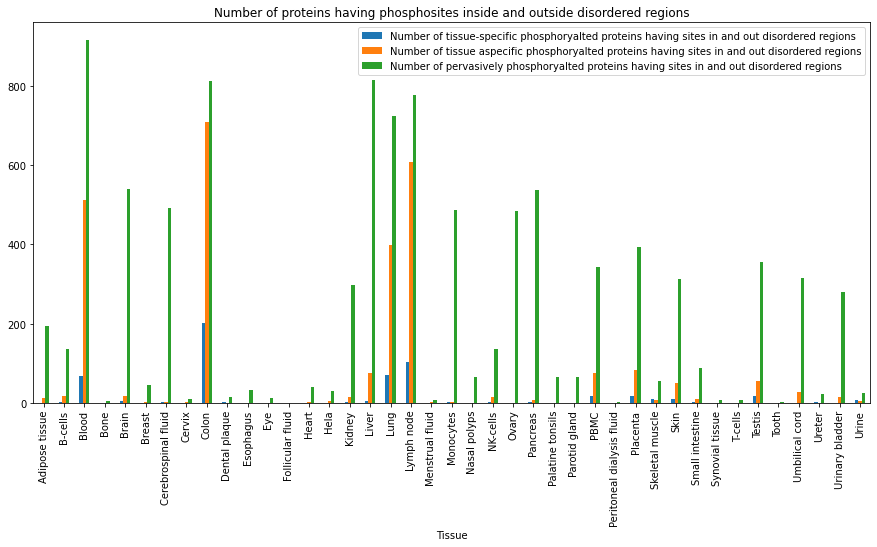

In [48]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_proteins_inandout_in.loc[tspec_proteins_inandout_in[tissue]==1]["ACC_ID"].nunique()
    count_taspec = taspec_proteins_inandout_in.loc[taspec_proteins_inandout_in[tissue]==1]["ACC_ID"].nunique()
    count_gen = gen_proteins_inandout_in.loc[gen_proteins_inandout_in[tissue]==1]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both = pd.DataFrame({"Tissue": list_tissues_STY, "Number of tissue-specific phosphoryalted proteins having sites in and out disordered regions": tspec_counts,
                             "Number of tissue aspecific phosphoryalted proteins having sites in and out disordered regions": taspec_counts,
                             "Number of pervasively phosphoryalted proteins having sites in and out disordered regions": gen_counts})
distr_tissues_both.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of proteins having phosphosites inside and outside disordered regions")

# Comparison of the frequency of disorderedness on the protein level with UniProtKB proteins

In [49]:
for i in range(1041):
    proteins_mobi.drop(i, axis=1, inplace=True)
    print(i)
proteins_mobi

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,32
1,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,39
2,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,47
3,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,65
4,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,66
...,...,...,...,...,...,...,...
82918,Q8WYJ6,prediction-disorder-mobidb_lite,352..372,0.056,21,372,206
82919,Q8WYJ6,prediction-disorder-mobidb_lite,352..372,0.056,21,372,247
82920,Q8WYJ6,prediction-disorder-mobidb_lite,352..372,0.056,21,372,248
82921,Q8WYJ6,prediction-disorder-mobidb_lite,352..372,0.056,21,372,315


In [50]:
tspec_proteins = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
taspec_proteins = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
gen_proteins = pd.read_csv("1.1 general P proteins", sep="\t")

In [51]:
tspec_proteins_mobi1 = pd.merge(tspec_proteins, proteins_mobi, on=["ACC_ID"], how="inner")
print(tspec_proteins_mobi1["ACC_ID"].nunique())
taspec_proteins_mobi1 = pd.merge(taspec_proteins, proteins_mobi, on=["ACC_ID"], how="inner")
print(taspec_proteins_mobi1["ACC_ID"].nunique())
gen_proteins_mobi1 = pd.merge(gen_proteins, proteins_mobi, on=["ACC_ID"], how="inner")
print(gen_proteins_mobi1["ACC_ID"].nunique())

2025
2071
1752


In [52]:
Uniprot = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot.rename({"Entry": "ACC_ID"}, axis=1, inplace=True)
Uniprot_mobi = pd.merge(Uniprot["ACC_ID"], mobi, on=["ACC_ID"], how="inner")
print(Uniprot_mobi["ACC_ID"].nunique())

20224


# Proteins with interaction interfaces

See also: https://www.mobidb.org/about/mobidb
Here, we only consider these proteins having at least one P-site in a disordered region that is associated with some form of interaction interface: "linear interacting peptides" or lip, and these regions undergoing structural changes ("disorder-to-disorder" or "disorder-to-order").

In [32]:
mobi1[(((mobi1["feature"].str.contains("lip"))|
               (mobi1["feature"].str.contains("binding_mode"))))]["feature"].value_counts()

prediction-lip-anchor                                  57042
derived-binding_mode_disorder_to_disorder-mobi          4618
derived-binding_mode_disorder_to_disorder-priority      4613
derived-binding_mode_disorder_to_order-mobi             3779
derived-binding_mode_disorder_to_order-priority         3765
prediction-lip-priority                                 2273
derived-lip-merge                                       2248
derived-lip-th_90                                       1757
derived-lip-priority                                    1531
homology-lip-merge                                       621
curated-lip-merge                                        620
curated-lip-priority                                     618
homology-lip-priority                                    588
homology-lip-disprot                                     338
curated-lip-disprot                                      295
curated-lip-dibs                                         268
homology-lip-dibs       

In [33]:
mobi = mobi1[(((mobi1["feature"].str.contains("lip"))|
               (mobi1["feature"].str.contains("binding_mode"))))]
mobi.rename({"acc": "ACC_ID"}, inplace=True, axis=1)
print(mobi.shape[0])
mobi.head()

86622


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1330/469402886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobi.rename({"acc": "ACC_ID"}, inplace=True, axis=1)


,ACC_ID,feature,start..end,content_fraction,content_count,length
24,A0A7P0T821,prediction-lip-anchor,"1..6,32..43,56..60",0.383,23,60
47,A0A7P0T8G2,prediction-lip-anchor,"13..13,26..30,60..68,116..125,146..153,171..17...",0.219,61,279
60,A0A7P0Z4R0,prediction-lip-anchor,"579..586,607..608",0.016,10,618
88,A0A7P0T9L5,prediction-lip-anchor,"12..18,339..342,405..407,476..478",0.028,17,610
105,A0A7P0TAB6,prediction-lip-anchor,"1..27,64..70,104..120",0.216,51,236


In [34]:
mobi1[((mobi1["feature"].str.contains("lip")==False)&(mobi1["feature"].str.contains("binding_mode")==False)|
            (mobi1["feature"].str.contains("prediction")==True))]["feature"].value_counts()

prediction-disorder-espX                               77660
prediction-disorder-th_50                              77629
prediction-disorder-iups                               77579
prediction-disorder-glo                                77356
prediction-disorder-espN                               76060
prediction-disorder-vsl                                69541
prediction-disorder-dis465                             69260
prediction-disorder-disHL                              69260
prediction-disorder-iupl                               62131
homology-domain-merge                                  57280
prediction-lip-anchor                                  57042
homology-domain-pfam                                   53966
prediction-low_complexity-merge                        53261
prediction-low_complexity-seg                          47313
prediction-disorder-espD                               46079
prediction-disorder-mobidb_lite                        34865
homology-domain-gene3d  

In [35]:
data_site_if= pd.read_csv("site_data", sep="\t")
data_site_if.head()

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
proteins_mobi_if = pd.merge(mobi, data_site[["ACC_ID", "UP_POS"]], on="ACC_ID", how="inner")
print(proteins_mobi_if.shape[0])
proteins_mobi_if.head()

90645


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,32
1,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,39
2,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,47
3,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,65
4,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,66


In [37]:
proteins_mobi1_if = proteins_mobi_if["start..end"].str.split(",", expand=True)

In [38]:
proteins_mobi_if = pd.merge(proteins_mobi_if, proteins_mobi1_if, how="inner", left_index=True, right_index=True)
print(proteins_mobi_if.shape[0])
proteins_mobi_if.head()

90645


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS,0,1,2,...,492,493,494,495,496,497,498,499,500,501
0,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,32,25..28,46..53,95..106,...,None,None,None,None,None,None,None,None,None,None
1,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,39,25..28,46..53,95..106,...,None,None,None,None,None,None,None,None,None,None
2,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,47,25..28,46..53,95..106,...,None,None,None,None,None,None,None,None,None,None
3,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,65,25..28,46..53,95..106,...,None,None,None,None,None,None,None,None,None,None
4,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,66,25..28,46..53,95..106,...,None,None,None,None,None,None,None,None,None,None


In [39]:
proteins_mobi_sub_tot_if = pd.DataFrame({})
for i in range (502):
    proteins_mobi_sub = proteins_mobi_if.loc[proteins_mobi_if["UP_POS"].astype(float, copy=False).between(proteins_mobi_if[i].str.partition("..")[0].astype(float, copy=False), proteins_mobi_if[i].str.partition("..")[2].astype(float, copy=False))]
    proteins_mobi_sub_tot_if = proteins_mobi_sub_tot_if.append(proteins_mobi_sub, ignore_index=True)
    if i%10==0:
        print(i)

/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_1330/3856157848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  proteins_mobi_sub_tot_if = proteins_mobi_sub_tot_if.append(proteins_mobi_sub, ignore_index=True)


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500


In [40]:
for i in range(502):
    proteins_mobi_sub_tot_if.drop(i, axis=1, inplace=True)
print(proteins_mobi_sub_tot_if.shape[0])
print(proteins_mobi_sub_tot_if["ACC_ID"].nunique())
proteins_mobi_sub_tot_if.head()

15740
2799


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P27348,derived-binding_mode_disorder_to_disorder-mobi,232..245,0.057,14,245,232
1,P27348,derived-binding_mode_disorder_to_disorder-prio...,232..245,0.057,14,245,232
2,P22314,derived-binding_mode_disorder_to_disorder-mobi,"1..48,804..815,1058..1058",0.058,61,1058,13
3,P22314,derived-binding_mode_disorder_to_disorder-mobi,"1..48,804..815,1058..1058",0.058,61,1058,46
4,P22314,derived-binding_mode_disorder_to_disorder-prio...,"1..48,804..815,1058..1058",0.058,61,1058,13


In [41]:
t_spec_prot = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
non_t_spec_prot = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
general_P_prot = pd.read_csv("1.1 general P proteins", sep="\t")

As expected, considerably less proteins are associated with interaction interfaces.

In [42]:
tspec_prot = pd.merge(t_spec_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(tspec_prot.shape[0])
print(tspec_prot["ACC_ID"].nunique())
tspec_prot_mobi_if = pd.merge(tspec_prot, proteins_mobi_sub_tot_if, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_prot_mobi_if.shape[0])
print(tspec_prot_mobi_if["ACC_ID"].nunique())
tspec_prot_mobi_if.head()

2794
2029
1271
595


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0A0U1RRK4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,41,prediction-lip-anchor,"1..1,12..108",0.907,98,108
1,A0A1B0GTU1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,760,prediction-lip-anchor,"91..96,117..127,132..143,152..163,188..220,237...",0.463,373,805
2,A0A1B0GTU1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,762,prediction-lip-anchor,"91..96,117..127,132..143,152..163,188..220,237...",0.463,373,805
3,A0A1B0GTU1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,763,prediction-lip-anchor,"91..96,117..127,132..143,152..163,188..220,237...",0.463,373,805
4,A1A5D9,0,0,0,0,0,0,0,0,0,...,0,0,0,1,371,prediction-lip-anchor,"1..3,7..39,50..72,181..194,240..243,263..273,2...",0.350,178,508


In [43]:
taspec_prot = pd.merge(non_t_spec_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(taspec_prot.shape[0])
print(taspec_prot["ACC_ID"].nunique())
taspec_prot_mobi_if = pd.merge(taspec_prot, proteins_mobi_sub_tot_if, how="inner", on=["ACC_ID", "UP_POS"])
print(taspec_prot_mobi_if.shape[0])
print(taspec_prot_mobi_if["ACC_ID"].nunique())
taspec_prot_mobi_if.head()

7371
2074
4529
1096


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,68,prediction-lip-anchor,"6..18,22..40,60..71,119..128,378..385,394..405...",0.300,260,867
1,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,71,prediction-lip-anchor,"6..18,22..40,60..71,119..128,378..385,394..405...",0.300,260,867
2,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,192,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244
3,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,192,derived-binding_mode_disorder_to_disorder-prio...,"1..62,165..244",0.582,142,244
4,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,194,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244


In [44]:
gen_prot = pd.merge(general_P_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(gen_prot.shape[0])
print(gen_prot["ACC_ID"].nunique())
gen_prot_mobi_if = pd.merge(gen_prot, proteins_mobi_sub_tot_if, how="inner", on=["ACC_ID", "UP_POS"])
print(gen_prot_mobi_if.shape[0])
print(gen_prot_mobi_if["ACC_ID"].nunique())
gen_prot_mobi_if.head()

13738
1752
9940
1108


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,736,prediction-lip-anchor,"1..81,535..543,587..592,611..625,631..637,644....",0.258,238,921
1,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,737,prediction-lip-anchor,"1..81,535..543,587..592,611..625,631..637,644....",0.258,238,921
2,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,738,prediction-lip-anchor,"1..81,535..543,587..592,611..625,631..637,644....",0.258,238,921
3,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,739,prediction-lip-anchor,"1..81,535..543,587..592,611..625,631..637,644....",0.258,238,921
4,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,743,prediction-lip-anchor,"1..81,535..543,587..592,611..625,631..637,644....",0.258,238,921


# Type of feature

We'll now investigate what kind of interactions we're dealing with for each category and per tissue.

<AxesSubplot:title={'center':'Type of annotation for tissue-specific phosphoryalted proteins'}, xlabel='feature'>

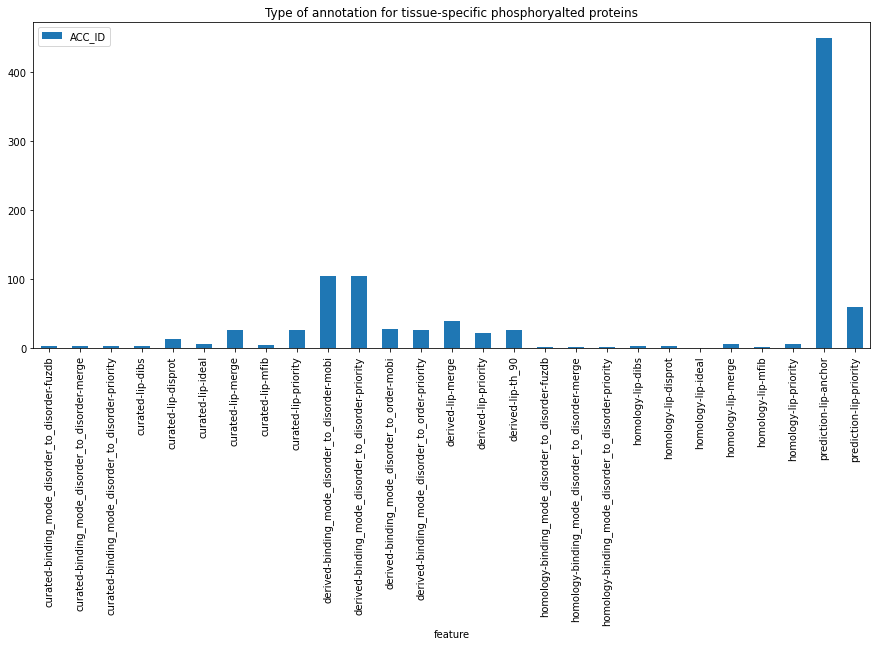

In [45]:
tspec_features = tspec_prot_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
tspec_features.plot(x="feature", kind="bar", color="tab:blue", figsize=(15,6), title="Type of annotation for tissue-specific phosphoryalted proteins")

#There is overlap between the different categories

<AxesSubplot:title={'center':'Type of annotation for tissue aspecific phosphorylated proteins'}, xlabel='feature'>

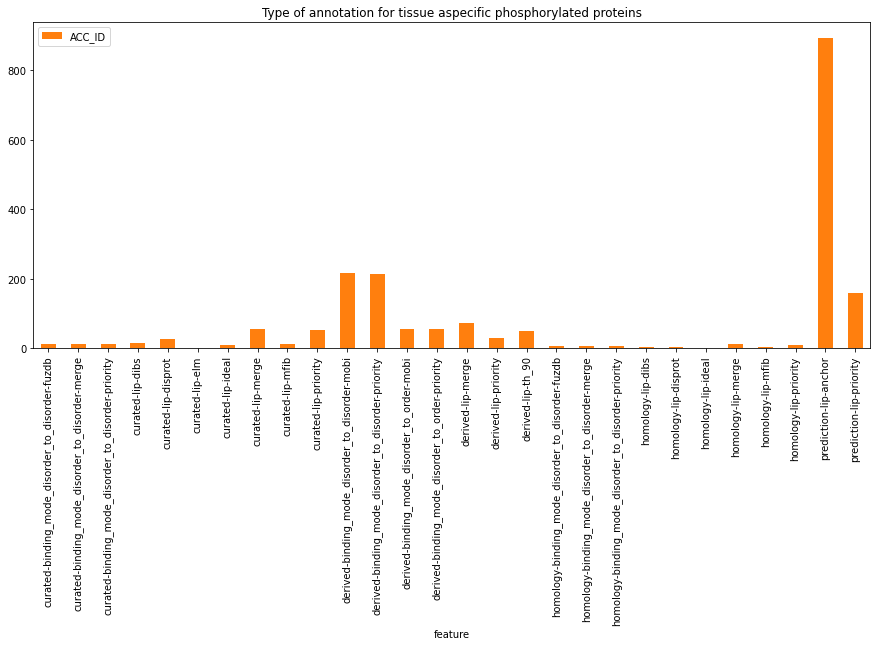

In [46]:
taspec_features = taspec_prot_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
taspec_features.plot(x="feature", kind="bar", color="tab:orange", figsize=(15,6), title="Type of annotation for tissue aspecific phosphorylated proteins")

#There is overlap between the different categories

<AxesSubplot:title={'center':'Type of annotation for pervasively phosphorylated proteins'}, xlabel='feature'>

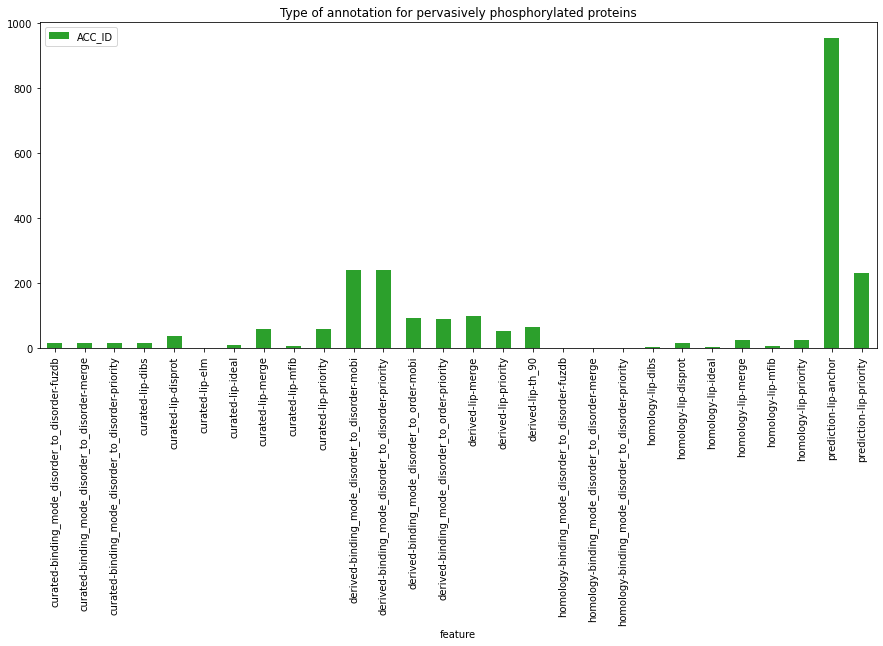

In [47]:
gen_features = gen_prot_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
gen_features.plot(x="feature", kind="bar", color="tab:green", figsize=(15,6), title="Type of annotation for pervasively phosphorylated proteins")

#There is overlap between the different categories

Here, we show the percentage of proteins associated with a certain type of interaction interface compared to the amount of proteins having P-sites in an interaction interface, per category.

<AxesSubplot:title={'center':'Ratio of proteins in each category associated with the three major kinds of annotation'}, xlabel='feature'>

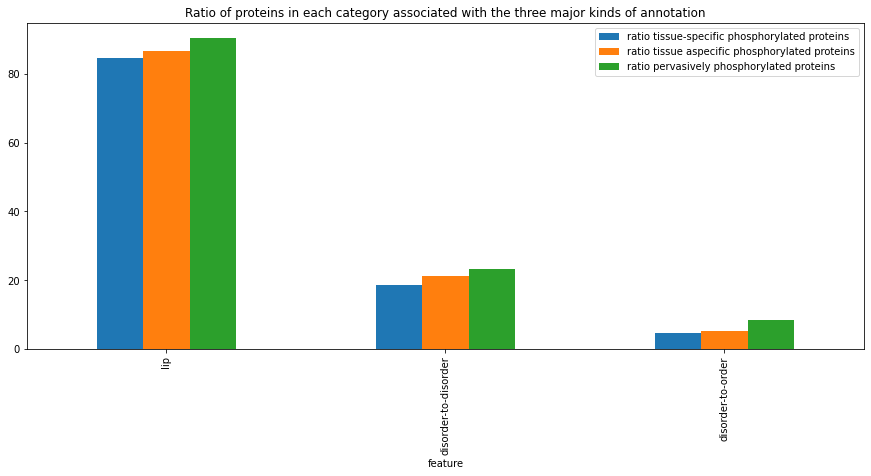

In [48]:
list_tspec = []
list_taspec = []
list_gen = []
for item in ["lip", "disorder_to_disorder", "disorder_to_order"]:
    count_item_tspec = tspec_prot_mobi_if.loc[tspec_prot_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_taspec = taspec_prot_mobi_if.loc[taspec_prot_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_gen = gen_prot_mobi_if.loc[gen_prot_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    list_tspec.append(count_item_tspec*100/tspec_prot_mobi_if["ACC_ID"].nunique())
    list_taspec.append(count_item_taspec*100/taspec_prot_mobi_if["ACC_ID"].nunique())
    list_gen.append(count_item_gen*100/gen_prot_mobi_if["ACC_ID"].nunique())
summarised_features = pd.DataFrame({"feature": ["lip", "disorder-to-disorder", "disorder-to-order"],
                                  "ratio tissue-specific phosphorylated proteins": list_tspec,
                                  "ratio tissue aspecific phosphorylated proteins": list_taspec,
                                  "ratio pervasively phosphorylated proteins": list_gen})
summarised_features.plot(kind="bar", x="feature", figsize=(15,6), title="Ratio of proteins in each category associated with the three major kinds of annotation")

<AxesSubplot:title={'center':'Number of proteins having interaction interfaces'}, xlabel='Tissue'>

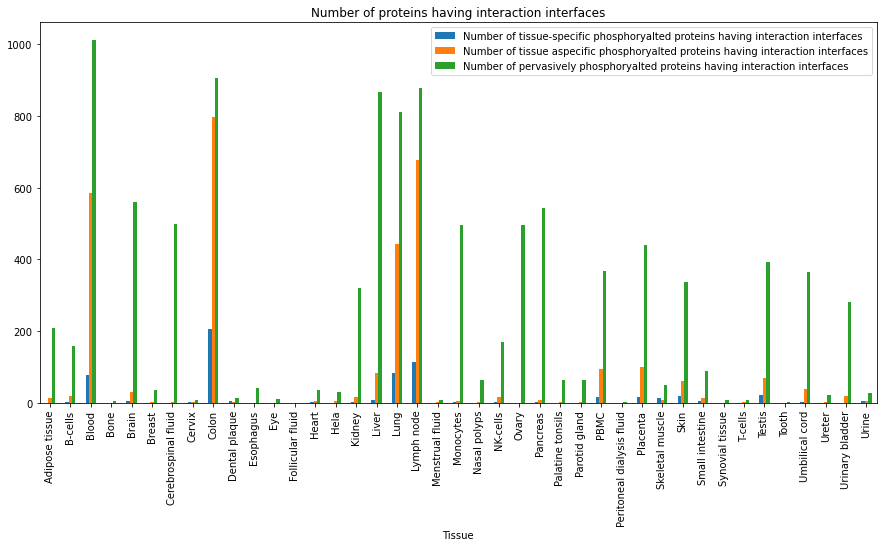

In [49]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_prot_mobi_if.loc[tspec_prot_mobi_if[tissue]==1]["ACC_ID"].nunique()
    count_taspec = taspec_prot_mobi_if.loc[taspec_prot_mobi_if[tissue]==1]["ACC_ID"].nunique()
    count_gen = gen_prot_mobi_if.loc[gen_prot_mobi_if[tissue]==1]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both = pd.DataFrame({"Tissue": list_tissues_STY, "Number of tissue-specific phosphoryalted proteins having interaction interfaces": tspec_counts,
                             "Number of tissue aspecific phosphoryalted proteins having interaction interfaces": taspec_counts,
                             "Number of pervasively phosphoryalted proteins having interaction interfaces": gen_counts})
distr_tissues_both.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of proteins having interaction interfaces")

Although the relative contribution of the annotation seems to differ across tissues for the proteins having P-sites in disordered regions associated with interaction interfaces, this is difficult to establish given the low number of such proteins and the difference in representation across tissues.

<AxesSubplot:title={'center':'Ratio of proteins associated with lip'}, xlabel='Tissue'>

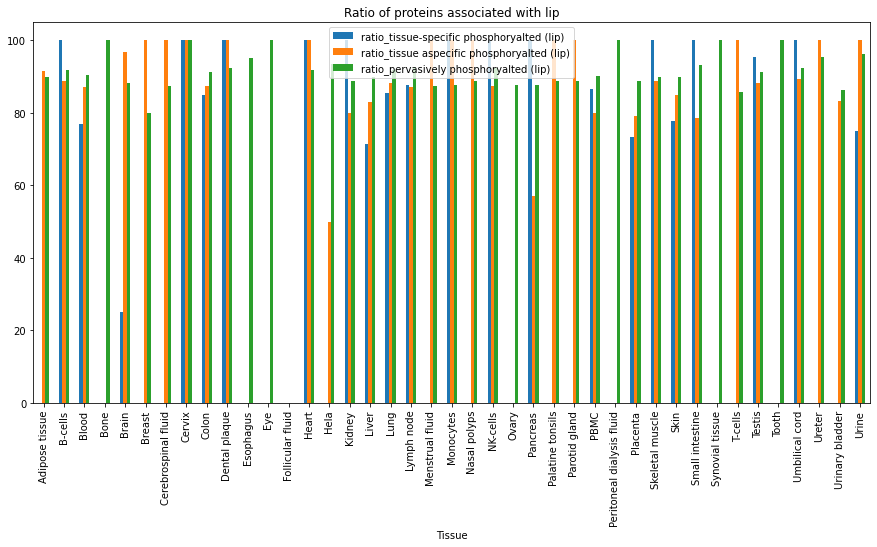

In [50]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_prot_mobi_if.loc[(tspec_prot_mobi_if[tissue]==1)&(tspec_prot_mobi_if["feature"].str.contains("lip"))]["ACC_ID"].nunique()
    count_taspec = taspec_prot_mobi_if.loc[(taspec_prot_mobi_if[tissue]==1)&(taspec_prot_mobi_if["feature"].str.contains("lip"))]["ACC_ID"].nunique()
    count_gen = gen_prot_mobi_if.loc[(gen_prot_mobi_if[tissue]==1)&(gen_prot_mobi_if["feature"].str.contains("lip"))]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphorylated proteins (lip)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphorylated proteins (lip)"] = taspec_counts
distr_tissues_both["pervasively phosphorylated proteins (lip)"] = gen_counts
distr_tissues_both["ratio_tissue-specific phosphoryalted (lip)"] = distr_tissues_both["tissue-specific phosphorylated proteins (lip)"]*100/distr_tissues_both["Number of tissue-specific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphoryalted (lip)"] = distr_tissues_both["tissue aspecific phosphorylated proteins (lip)"]*100/distr_tissues_both["Number of tissue aspecific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_pervasively phosphoryalted (lip)"] = distr_tissues_both["pervasively phosphorylated proteins (lip)"]*100/distr_tissues_both["Number of pervasively phosphoryalted proteins having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphoryalted (lip)", "ratio_tissue aspecific phosphoryalted (lip)",
                   "ratio_pervasively phosphoryalted (lip)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio of proteins associated with lip")

<AxesSubplot:title={'center':'Ratio proteins associated with disorder-to-disorder transition'}, xlabel='Tissue'>

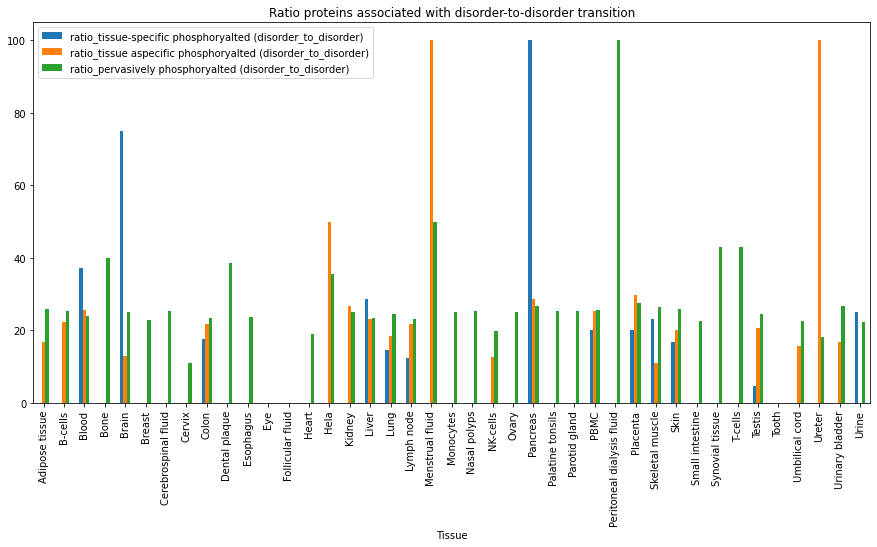

In [51]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_prot_mobi_if.loc[(tspec_prot_mobi_if[tissue]==1)&(tspec_prot_mobi_if["feature"].str.contains("disorder_to_disorder")),:]["ACC_ID"].nunique()
    count_taspec = taspec_prot_mobi_if.loc[(taspec_prot_mobi_if[tissue]==1)&(taspec_prot_mobi_if["feature"].str.contains("disorder_to_disorder")),:]["ACC_ID"].nunique()
    count_gen = gen_prot_mobi_if.loc[(gen_prot_mobi_if[tissue]==1)&(gen_prot_mobi_if["feature"].str.contains("disorder_to_disorder")),:]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphorylated proteins (disorder_to_disorder)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphorylated proteins (disorder_to_disorder)"] = taspec_counts
distr_tissues_both["pervasively phosphorylated proteins (disorder_to_disorder)"] = gen_counts

distr_tissues_both["ratio_tissue-specific phosphoryalted (disorder_to_disorder)"] = distr_tissues_both["tissue-specific phosphorylated proteins (disorder_to_disorder)"]*100/distr_tissues_both["Number of tissue-specific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphoryalted (disorder_to_disorder)"] = distr_tissues_both["tissue aspecific phosphorylated proteins (disorder_to_disorder)"]*100/distr_tissues_both["Number of tissue aspecific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_pervasively phosphoryalted (disorder_to_disorder)"] = distr_tissues_both["pervasively phosphorylated proteins (disorder_to_disorder)"]*100/distr_tissues_both["Number of pervasively phosphoryalted proteins having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphoryalted (disorder_to_disorder)", "ratio_tissue aspecific phosphoryalted (disorder_to_disorder)",
                   "ratio_pervasively phosphoryalted (disorder_to_disorder)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio proteins associated with disorder-to-disorder transition")

<AxesSubplot:title={'center':'Ratio proteins associated with disorder-to-order transitions'}, xlabel='Tissue'>

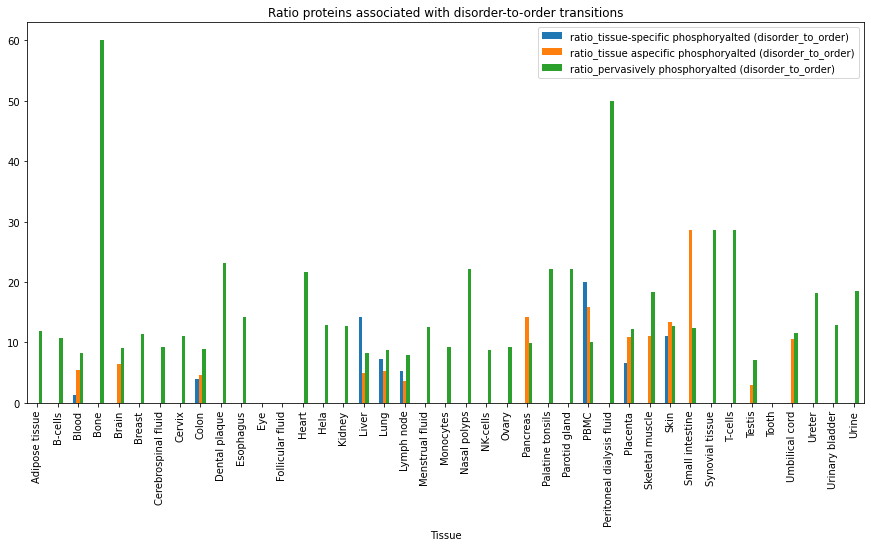

In [52]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_prot_mobi_if.loc[(tspec_prot_mobi_if[tissue]==1)&(tspec_prot_mobi_if["feature"].str.contains("disorder_to_order")),:]["ACC_ID"].nunique()
    count_taspec = taspec_prot_mobi_if.loc[(taspec_prot_mobi_if[tissue]==1)&(taspec_prot_mobi_if["feature"].str.contains("disorder_to_order")),:]["ACC_ID"].nunique()
    count_gen = gen_prot_mobi_if.loc[(gen_prot_mobi_if[tissue]==1)&(gen_prot_mobi_if["feature"].str.contains("disorder_to_order")),:]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphorylated proteins (disorder_to_order)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphorylated proteins (disorder_to_order)"] = taspec_counts
distr_tissues_both["pervasively phosphorylated proteins (disorder_to_order)"] = gen_counts


distr_tissues_both["ratio_tissue-specific phosphoryalted (disorder_to_order)"] = distr_tissues_both["tissue-specific phosphorylated proteins (disorder_to_order)"]*100/distr_tissues_both["Number of tissue-specific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphoryalted (disorder_to_order)"] = distr_tissues_both["tissue aspecific phosphorylated proteins (disorder_to_order)"]*100/distr_tissues_both["Number of tissue aspecific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_pervasively phosphoryalted (disorder_to_order)"] = distr_tissues_both["pervasively phosphorylated proteins (disorder_to_order)"]*100/distr_tissues_both["Number of pervasively phosphoryalted proteins having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphoryalted (disorder_to_order)", "ratio_tissue aspecific phosphoryalted (disorder_to_order)",
                   "ratio_pervasively phosphoryalted (disorder_to_order)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio proteins associated with disorder-to-order transitions")

# Comparison of the ratio of disorderedness from UniProtKB proteins

In [53]:
tspec_proteins_mobi_if = pd.merge(t_spec_prot, proteins_mobi_if, on=["ACC_ID"], how="inner")
print(tspec_proteins_mobi_if["ACC_ID"].nunique())
taspec_proteins_mobi_if = pd.merge(non_t_spec_prot, proteins_mobi_if, on=["ACC_ID"], how="inner")
print(taspec_proteins_mobi_if["ACC_ID"].nunique())
gen_proteins_mobi_if = pd.merge(gen_prot, proteins_mobi_if, on=["ACC_ID"], how="inner")
print(gen_proteins_mobi_if["ACC_ID"].nunique())

Uniprot_if = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot_if.rename({"Entry": "ACC_ID"}, axis=1, inplace=True)
Uniprot_mobi_if = pd.merge(Uniprot_if["ACC_ID"], mobi, on=["ACC_ID"], how="inner")
print(Uniprot_mobi_if["ACC_ID"].nunique())

1896
2003
1704
17272


<AxesSubplot:title={'center':'Feature associated with tissue-specific phosphoryalted proteins'}, xlabel='feature'>

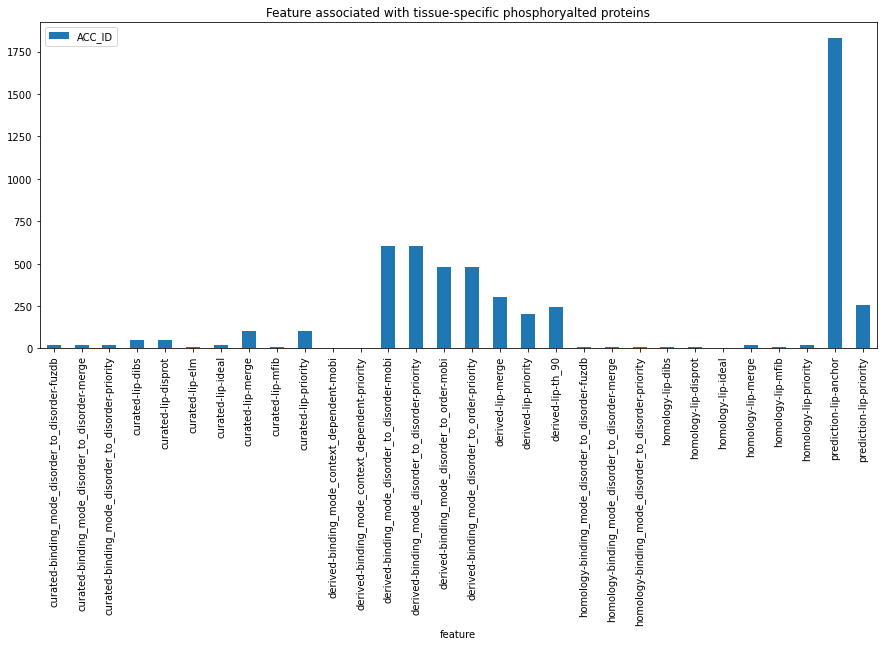

In [54]:
tspec_features = tspec_proteins_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
tspec_features.plot(x="feature", kind="bar", color="tab:blue", figsize=(15,6), title="Feature associated with tissue-specific phosphoryalted proteins")

<AxesSubplot:title={'center':'Features associated with tissue aspecific phosphorylated proteins'}, xlabel='feature'>

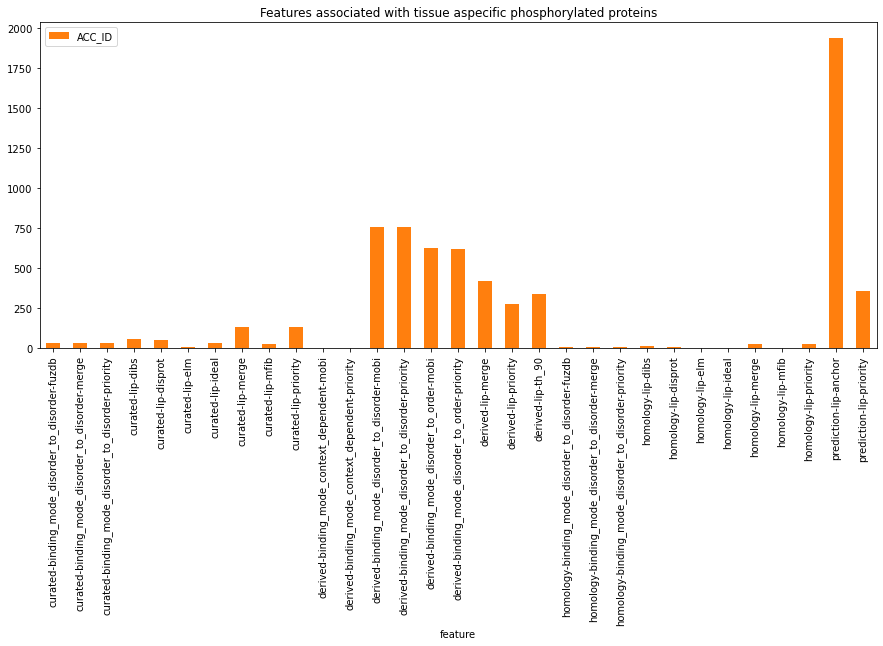

In [55]:
taspec_features = taspec_proteins_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
taspec_features.plot(x="feature", kind="bar", color="tab:orange", figsize=(15,6), title="Features associated with tissue aspecific phosphorylated proteins")

<AxesSubplot:title={'center':'Features associated with pervasively phosphorylated proteins'}, xlabel='feature'>

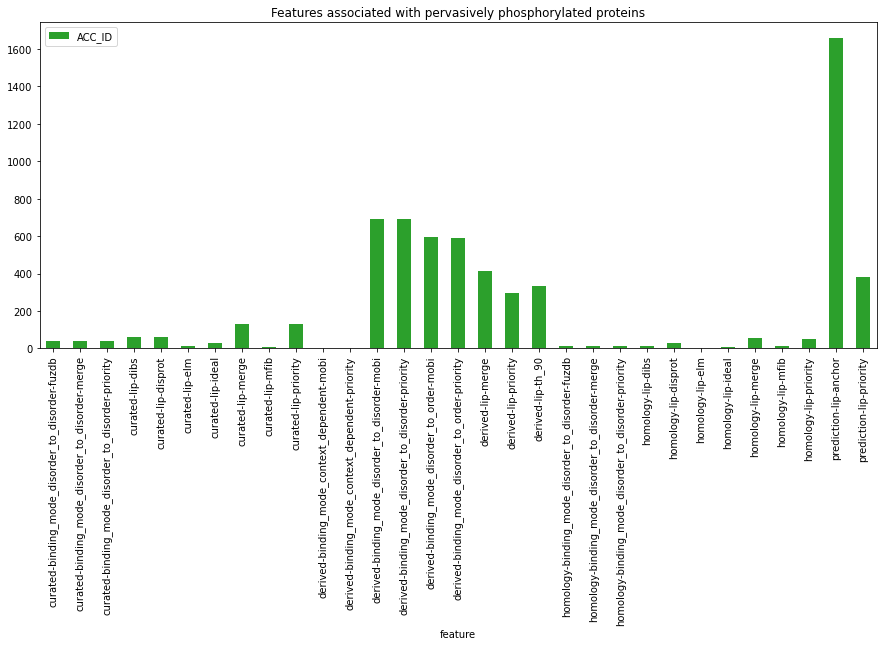

In [56]:
gen_features = gen_proteins_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
gen_features.plot(x="feature", kind="bar", color="tab:green", figsize=(15,6), title="Features associated with pervasively phosphorylated proteins")

<AxesSubplot:title={'center':'Features associated with UniProtKB proteins'}, xlabel='feature'>

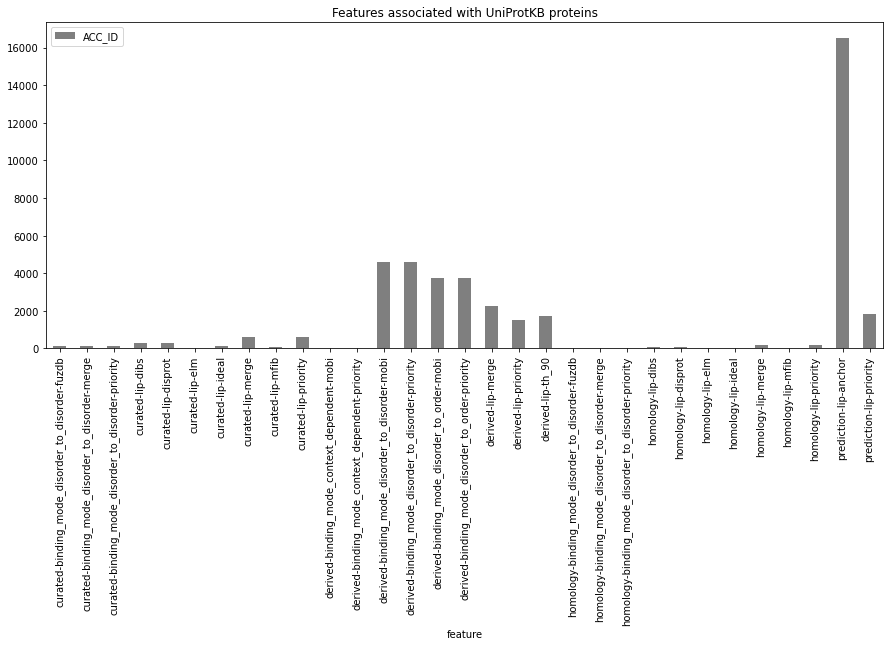

In [57]:
uniprot_features = Uniprot_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
uniprot_features.plot(x="feature", kind="bar", color="tab:grey", figsize=(15,6), title="Features associated with UniProtKB proteins")

In [58]:
print(tspec_proteins_mobi_if["ACC_ID"].nunique()*100/Uniprot_mobi_if["ACC_ID"].nunique())
print(taspec_proteins_mobi_if["ACC_ID"].nunique()*100/Uniprot_mobi_if["ACC_ID"].nunique())
print(gen_proteins_mobi_if["ACC_ID"].nunique()*100/Uniprot_mobi_if["ACC_ID"].nunique())

10.977304307549792
11.596804075961094
9.865678554886522


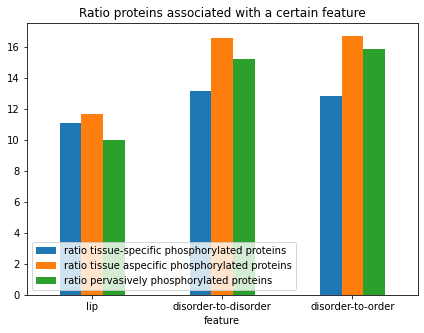

In [60]:
list_tspec = []
list_taspec = []
list_gen = []
for item in ["lip", "disorder_to_disorder", "disorder_to_order"]:
    count_item_tspec = tspec_proteins_mobi_if.loc[tspec_proteins_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_taspec = taspec_proteins_mobi_if.loc[taspec_proteins_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_gen = gen_proteins_mobi_if.loc[gen_proteins_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_uniprot = Uniprot_mobi_if.loc[Uniprot_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    list_tspec.append(count_item_tspec*100/count_item_uniprot)
    list_taspec.append(count_item_taspec*100/count_item_uniprot)
    list_gen.append(count_item_gen*100/count_item_uniprot)
summarised_features = pd.DataFrame({"feature": ["lip", "disorder-to-disorder", "disorder-to-order"],
                                  "ratio tissue-specific phosphorylated proteins": list_tspec,
                                  "ratio tissue aspecific phosphorylated proteins": list_taspec,
                                  "ratio pervasively phosphorylated proteins": list_gen})
summarised_features.plot(kind="bar", x="feature", figsize=(7,5), title="Ratio proteins associated with a certain feature", rot=0).legend(loc="lower left")
#plt.savefig("WP2 MobiDB_ratio phosphoproteins annotated with interaction interfacres.png", format="png", bbox_inches="tight")

In [61]:
summarised_features

,feature,ratio tissue-specific phosphorylated proteins,ratio tissue aspecific phosphorylated proteins,ratio pervasively phosphorylated proteins
0,lip,11.058725,11.673430,9.984483
1,disorder-to-disorder,13.139311,16.563236,15.193666
2,disorder-to-order,12.806177,16.693291,15.867945
